In [25]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from PROMETHEE import PROMETHEE_2, optimize_PROM2_original, optimize_newconstraint, optimize_PROM2_original_positive_beta
from sklearn.preprocessing import StandardScaler 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
centers_ = [(2, 2, 2, 2, 2), (7, 7, 7, 7, 7), (10, 10, 10, 10, 10), (10,10,10,10,10)]

X, y = make_blobs(n_samples=[1, 7, 6, 1], centers=centers_, n_features=5, cluster_std= [0.25, 2.5, 2.5, 0.25], random_state=0)

In [27]:
m, n = X.shape
X

array([[ 4.5568053 ,  9.37522104,  6.62160698,  6.74195287,  8.02649625],
       [ 7.39087242, 10.0757267 , 10.00594962,  6.03168296,  6.24424312],
       [ 0.61752546,  8.63404649,  9.1610905 ,  5.14458745, 12.67438656],
       [11.07082968, 10.16629306, 10.75617974,  8.41419477,  9.09314709],
       [ 7.36010893, 10.63568377,  8.90259431,  7.30418754,  8.10965808],
       [10.18227264, 10.03224573, 10.28485017,  9.69129354, 10.10058541],
       [ 8.99554766,  5.92450413, 11.15695564,  7.73175409, 10.12986349],
       [ 3.36408581,  7.11439629,  6.53204037, 10.83194804, 10.67339692],
       [ 8.90481425,  6.8680116 , 11.94372589,  5.96525538,  9.4681493 ],
       [ 7.37861759,  6.44995516,  5.73432452, 14.87693849,  8.72586955],
       [ 8.31884888,  9.1011171 ,  7.96713429,  5.68429349, 10.44356536],
       [ 7.7613336 , 10.96725624,  8.72298716,  7.04841954,  9.92954443],
       [ 7.83418582, 10.73519768,  6.48710434,  7.78266925,  4.86476065],
       [ 7.38736856,  7.9454063 ,  4.7

In [28]:
#print the decision matrix
A = pd.DataFrame(X, columns = ['$g_' + str(i+1) + '$' for i in range (X.shape[1])], index= ['$a_' + str(i+1) + '$' for i in range (X.shape[0])])
A

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,4.556805,9.375221,6.621607,6.741953,8.026496
$a_2$,7.390872,10.075727,10.005950,6.031683,6.244243
$a_3$,0.617525,8.634046,9.161090,5.144587,12.674387
$a_4$,11.070830,10.166293,10.756180,8.414195,9.093147
$a_5$,7.360109,10.635684,8.902594,7.304188,8.109658
$a_6$,10.182273,10.032246,10.284850,9.691294,10.100585
$a_7$,8.995548,5.924504,11.156956,7.731754,10.129863
$a_8$,3.364086,7.114396,6.532040,10.831948,10.673397
$a_9$,8.904814,6.868012,11.943726,5.965255,9.468149
$a_10$,7.378618,6.449955,5.734325,14.876938,8.725870


In [29]:
#Normalização
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit(A).transform(A) 
X_norm = pd.DataFrame(X_norm, columns=A.columns, index = A.index )
X_norm

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,0.376845,0.820458,0.451274,0.365887,0.544659
$a_2$,0.647962,0.899458,0.800210,0.310523,0.370057
$a_3$,0.000000,0.736872,0.713102,0.241375,1.000000
$a_4$,1.000000,0.909671,0.877560,0.496237,0.649156
$a_5$,0.645019,0.962607,0.686450,0.409713,0.552806
$a_6$,0.914997,0.894554,0.828965,0.595785,0.747852
$a_7$,0.801471,0.431304,0.918882,0.443041,0.750720
$a_8$,0.262746,0.565494,0.442039,0.684698,0.803969
$a_9$,0.792791,0.537708,1.000000,0.305345,0.685894
$a_10$,0.646790,0.490562,0.359792,1.000000,0.613175


C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

1 : 0.5226892906357522
2 : 0.4447683376975726
3 : 0.37256072580283395
4 : 0.30071931222195464
5 : 0.2554756052036317
6 : 0.2086503583407466
7 : 0.17580229187542437
8 : 0.13868735415554928
9 : 0.10838106908350185
10 : 0.0831115202584553
11 : 0.05858217538803733
12 : 0.037508900731911515
13 : 0.02398688321729955
14 : 0.011443821121791273


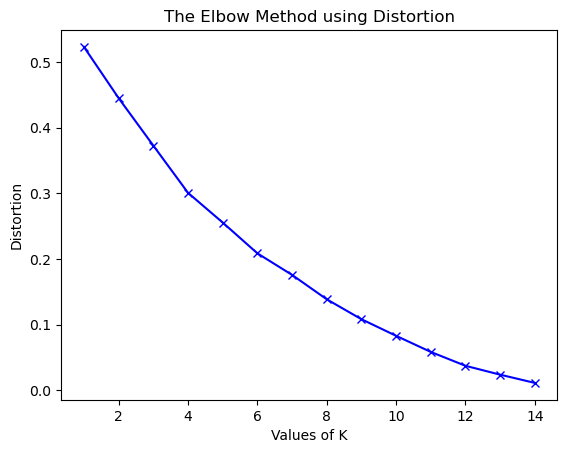

In [30]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

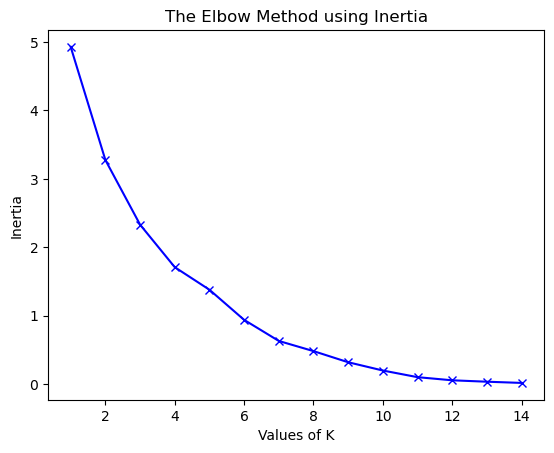

In [31]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

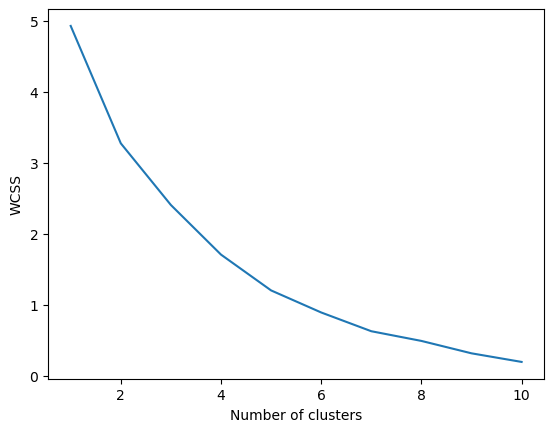

In [32]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_norm) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


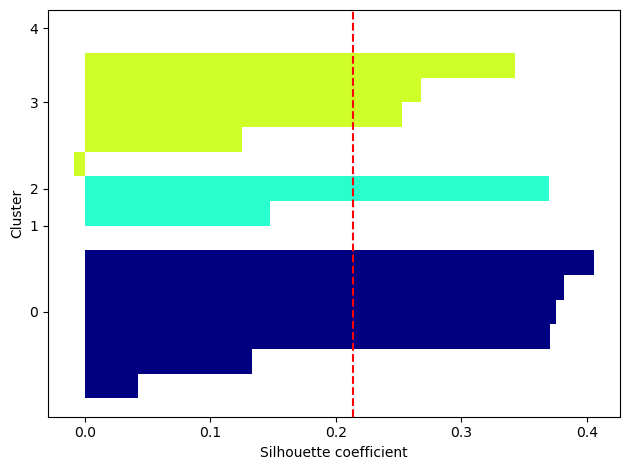

In [33]:
km = KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X_norm)
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_norm, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

In [34]:
silhouette_avg

0.21381828362196068

In [35]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_norm)
clusters = X_norm.assign(Category = kmeans.labels_)
clusters

C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\igor2\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$,Category
$a_1$,0.376845,0.820458,0.451274,0.365887,0.544659,3
$a_2$,0.647962,0.899458,0.800210,0.310523,0.370057,3
$a_3$,0.000000,0.736872,0.713102,0.241375,1.000000,4
$a_4$,1.000000,0.909671,0.877560,0.496237,0.649156,0
$a_5$,0.645019,0.962607,0.686450,0.409713,0.552806,3
$a_6$,0.914997,0.894554,0.828965,0.595785,0.747852,0
$a_7$,0.801471,0.431304,0.918882,0.443041,0.750720,0
$a_8$,0.262746,0.565494,0.442039,0.684698,0.803969,2
$a_9$,0.792791,0.537708,1.000000,0.305345,0.685894,0
$a_10$,0.646790,0.490562,0.359792,1.000000,0.613175,2


In [36]:
clusters.to_excel("clusters_toy_exemple.xlsx")

#PROMETHEE SCORING EM CADA CLUSTER

In [13]:
A = kmeans.cluster_centers_
A

array([[0.82156629, 0.76046393, 0.81389016, 0.41893801, 0.72436168],
       [0.17444127, 0.        , 0.        , 0.03992652, 0.        ],
       [0.45476781, 0.52802773, 0.4009157 , 0.84234887, 0.70857172],
       [0.60156508, 0.86311273, 0.52735868, 0.30662663, 0.41226424],
       [0.        , 0.73687237, 0.71310202, 0.24137467, 1.        ]])

In [14]:
m, n = A.shape

In [15]:
B = pd.DataFrame(A, columns = ['$g_' + str(i+1) + '$' for i in range (A.shape[1])], index= ['$c_' + str(i) + '$' for i in range (A.shape[0])])
B

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$c_0$,0.821566,0.760464,0.813890,0.418938,0.724362
$c_1$,0.174441,0.000000,0.000000,0.039927,0.000000
$c_2$,0.454768,0.528028,0.400916,0.842349,0.708572
$c_3$,0.601565,0.863113,0.527359,0.306627,0.412264
$c_4$,0.000000,0.736872,0.713102,0.241375,1.000000


In [16]:
#solve the problem with PROMETHEE II
net_flows_toy = PROMETHEE_2 (A, [0.15 for i in range (n)], [0.35 for i in range (n)], [0 for i in range (n)], [1/n for i in range (n)], [5 for i in range (n)])[1]
net_flows_toy = pd.DataFrame(net_flows_toy, index = B.index, columns=["$\phi$"])

In [17]:
net_flows_toy["Position"] = net_flows_toy.rank(ascending=False)
net_flows_toy

,$\phi$,Position
$c_0$,0.438248,1.0
$c_1$,-0.868508,5.0
$c_2$,0.211663,2.0
$c_3$,0.087776,4.0
$c_4$,0.130821,3.0


In [18]:
#Aplicando ao cluster 0
cluster_0 = pd.read_excel("cluster0.xlsx", index_col=0)
cluster_0

,g_1,g_2,g_3,g_4,g_5
a_4,1.000000,0.909671,0.877560,0.496237,0.649156
a_6,0.914997,0.894554,0.828965,0.595785,0.747852
a_7,0.801471,0.431304,0.918882,0.443041,0.750720
a_9,0.792791,0.537708,1.000000,0.305345,0.685894
a_11,0.736736,0.789546,0.590002,0.283444,0.781453
a_12,0.683402,1.000000,0.667932,0.389776,0.731095


In [19]:
X = np.array(cluster_0) # decision matrix
m, n = X.shape

In [20]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (0.1,0.25, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (0.25, 0.4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

simulation 665 completed
simulation 666 completed
simulation 667 completed
simulation 668 completed
simulation 669 completed
simulation 670 completed
simulation 671 completed
simulation 672 completed
simulation 673 completed
simulation 674 completed
simulation 675 completed
simulation 676 completed
simulation 677 completed
simulation 678 completed
simulation 679 completed
simulation 680 completed
simulation 681 completed
simulation 682 completed
simulation 683 completed
simulation 684 completed
simulation 685 completed
simulation 686 completed
simulation 687 completed
simulation 688 completed
simulation 689 completed
simulation 690 completed
simulation 691 completed
simulation 692 completed
simulation 693 completed
simulation 694 completed
simulation 695 completed
simulation 696 completed
simulation 697 completed
simulation 698 completed
simulation 699 completed
simulation 700 completed
simulation 701 completed
simulation 702 completed
simulation 703 completed
simulation 704 completed


simulation 1004 completed
simulation 1005 completed
simulation 1006 completed
simulation 1007 completed
simulation 1008 completed
simulation 1009 completed
simulation 1010 completed
simulation 1011 completed
simulation 1012 completed
simulation 1013 completed
simulation 1014 completed
simulation 1015 completed
simulation 1016 completed
simulation 1017 completed
simulation 1018 completed
simulation 1019 completed
simulation 1020 completed
simulation 1021 completed
simulation 1022 completed
simulation 1023 completed
simulation 1024 completed
simulation 1025 completed
simulation 1026 completed
simulation 1027 completed
simulation 1028 completed
simulation 1029 completed
simulation 1030 completed
simulation 1031 completed
simulation 1032 completed
simulation 1033 completed
simulation 1034 completed
simulation 1035 completed
simulation 1036 completed
simulation 1037 completed
simulation 1038 completed
simulation 1039 completed
simulation 1040 completed
simulation 1041 completed
simulation 1

simulation 1613 completed
simulation 1614 completed
simulation 1615 completed
simulation 1616 completed
simulation 1617 completed
simulation 1618 completed
simulation 1619 completed
simulation 1620 completed
simulation 1621 completed
simulation 1622 completed
simulation 1623 completed
simulation 1624 completed
simulation 1625 completed
simulation 1626 completed
simulation 1627 completed
simulation 1628 completed
simulation 1629 completed
simulation 1630 completed
simulation 1631 completed
simulation 1632 completed
simulation 1633 completed
simulation 1634 completed
simulation 1635 completed
simulation 1636 completed
simulation 1637 completed
simulation 1638 completed
simulation 1639 completed
simulation 1640 completed
simulation 1641 completed
simulation 1642 completed
simulation 1643 completed
simulation 1644 completed
simulation 1645 completed
simulation 1646 completed
simulation 1647 completed
simulation 1648 completed
simulation 1649 completed
simulation 1650 completed
simulation 1

simulation 1999 completed
simulation 2000 completed
simulation 2001 completed
simulation 2002 completed
simulation 2003 completed
simulation 2004 completed
simulation 2005 completed
simulation 2006 completed
simulation 2007 completed
simulation 2008 completed
simulation 2009 completed
simulation 2010 completed
simulation 2011 completed
simulation 2012 completed
simulation 2013 completed
simulation 2014 completed
simulation 2015 completed
simulation 2016 completed
simulation 2017 completed
simulation 2018 completed
simulation 2019 completed
simulation 2020 completed
simulation 2021 completed
simulation 2022 completed
simulation 2023 completed
simulation 2024 completed
simulation 2025 completed
simulation 2026 completed
simulation 2027 completed
simulation 2028 completed
simulation 2029 completed
simulation 2030 completed
simulation 2031 completed
simulation 2032 completed
simulation 2033 completed
simulation 2034 completed
simulation 2035 completed
simulation 2036 completed
simulation 2

simulation 2377 completed
simulation 2378 completed
simulation 2379 completed
simulation 2380 completed
simulation 2381 completed
simulation 2382 completed
simulation 2383 completed
simulation 2384 completed
simulation 2385 completed
simulation 2386 completed
simulation 2387 completed
simulation 2388 completed
simulation 2389 completed
simulation 2390 completed
simulation 2391 completed
simulation 2392 completed
simulation 2393 completed
simulation 2394 completed
simulation 2395 completed
simulation 2396 completed
simulation 2397 completed
simulation 2398 completed
simulation 2399 completed
simulation 2400 completed
simulation 2401 completed
simulation 2402 completed
simulation 2403 completed
simulation 2404 completed
simulation 2405 completed
simulation 2406 completed
simulation 2407 completed
simulation 2408 completed
simulation 2409 completed
simulation 2410 completed
simulation 2411 completed
simulation 2412 completed
simulation 2413 completed
simulation 2414 completed
simulation 2

simulation 2778 completed
simulation 2779 completed
simulation 2780 completed
simulation 2781 completed
simulation 2782 completed
simulation 2783 completed
simulation 2784 completed
simulation 2785 completed
simulation 2786 completed
simulation 2787 completed
simulation 2788 completed
simulation 2789 completed
simulation 2790 completed
simulation 2791 completed
simulation 2792 completed
simulation 2793 completed
simulation 2794 completed
simulation 2795 completed
simulation 2796 completed
simulation 2797 completed
simulation 2798 completed
simulation 2799 completed
simulation 2800 completed
simulation 2801 completed
simulation 2802 completed
simulation 2803 completed
simulation 2804 completed
simulation 2805 completed
simulation 2806 completed
simulation 2807 completed
simulation 2808 completed
simulation 2809 completed
simulation 2810 completed
simulation 2811 completed
simulation 2812 completed
simulation 2813 completed
simulation 2814 completed
simulation 2815 completed
simulation 2

simulation 3152 completed
simulation 3153 completed
simulation 3154 completed
simulation 3155 completed
simulation 3156 completed
simulation 3157 completed
simulation 3158 completed
simulation 3159 completed
simulation 3160 completed
simulation 3161 completed
simulation 3162 completed
simulation 3163 completed
simulation 3164 completed
simulation 3165 completed
simulation 3166 completed
simulation 3167 completed
simulation 3168 completed
simulation 3169 completed
simulation 3170 completed
simulation 3171 completed
simulation 3172 completed
simulation 3173 completed
simulation 3174 completed
simulation 3175 completed
simulation 3176 completed
simulation 3177 completed
simulation 3178 completed
simulation 3179 completed
simulation 3180 completed
simulation 3181 completed
simulation 3182 completed
simulation 3183 completed
simulation 3184 completed
simulation 3185 completed
simulation 3186 completed
simulation 3187 completed
simulation 3188 completed
simulation 3189 completed
simulation 3

simulation 3537 completed
simulation 3538 completed
simulation 3539 completed
simulation 3540 completed
simulation 3541 completed
simulation 3542 completed
simulation 3543 completed
simulation 3544 completed
simulation 3545 completed
simulation 3546 completed
simulation 3547 completed
simulation 3548 completed
simulation 3549 completed
simulation 3550 completed
simulation 3551 completed
simulation 3552 completed
simulation 3553 completed
simulation 3554 completed
simulation 3555 completed
simulation 3556 completed
simulation 3557 completed
simulation 3558 completed
simulation 3559 completed
simulation 3560 completed
simulation 3561 completed
simulation 3562 completed
simulation 3563 completed
simulation 3564 completed
simulation 3565 completed
simulation 3566 completed
simulation 3567 completed
simulation 3568 completed
simulation 3569 completed
simulation 3570 completed
simulation 3571 completed
simulation 3572 completed
simulation 3573 completed
simulation 3574 completed
simulation 3

simulation 3902 completed
simulation 3903 completed
simulation 3904 completed
simulation 3905 completed
simulation 3906 completed
simulation 3907 completed
simulation 3908 completed
simulation 3909 completed
simulation 3910 completed
simulation 3911 completed
simulation 3912 completed
simulation 3913 completed
simulation 3914 completed
simulation 3915 completed
simulation 3916 completed
simulation 3917 completed
simulation 3918 completed
simulation 3919 completed
simulation 3920 completed
simulation 3921 completed
simulation 3922 completed
simulation 3923 completed
simulation 3924 completed
simulation 3925 completed
simulation 3926 completed
simulation 3927 completed
simulation 3928 completed
simulation 3929 completed
simulation 3930 completed
simulation 3931 completed
simulation 3932 completed
simulation 3933 completed
simulation 3934 completed
simulation 3935 completed
simulation 3936 completed
simulation 3937 completed
simulation 3938 completed
simulation 3939 completed
simulation 3

simulation 4287 completed
simulation 4288 completed
simulation 4289 completed
simulation 4290 completed
simulation 4291 completed
simulation 4292 completed
simulation 4293 completed
simulation 4294 completed
simulation 4295 completed
simulation 4296 completed
simulation 4297 completed
simulation 4298 completed
simulation 4299 completed
simulation 4300 completed
simulation 4301 completed
simulation 4302 completed
simulation 4303 completed
simulation 4304 completed
simulation 4305 completed
simulation 4306 completed
simulation 4307 completed
simulation 4308 completed
simulation 4309 completed
simulation 4310 completed
simulation 4311 completed
simulation 4312 completed
simulation 4313 completed
simulation 4314 completed
simulation 4315 completed
simulation 4316 completed
simulation 4317 completed
simulation 4318 completed
simulation 4319 completed
simulation 4320 completed
simulation 4321 completed
simulation 4322 completed
simulation 4323 completed
simulation 4324 completed
simulation 4

simulation 4645 completed
simulation 4646 completed
simulation 4647 completed
simulation 4648 completed
simulation 4649 completed
simulation 4650 completed
simulation 4651 completed
simulation 4652 completed
simulation 4653 completed
simulation 4654 completed
simulation 4655 completed
simulation 4656 completed
simulation 4657 completed
simulation 4658 completed
simulation 4659 completed
simulation 4660 completed
simulation 4661 completed
simulation 4662 completed
simulation 4663 completed
simulation 4664 completed
simulation 4665 completed
simulation 4666 completed
simulation 4667 completed
simulation 4668 completed
simulation 4669 completed
simulation 4670 completed
simulation 4671 completed
simulation 4672 completed
simulation 4673 completed
simulation 4674 completed
simulation 4675 completed
simulation 4676 completed
simulation 4677 completed
simulation 4678 completed
simulation 4679 completed
simulation 4680 completed
simulation 4681 completed
simulation 4682 completed
simulation 4

simulation 5015 completed
simulation 5016 completed
simulation 5017 completed
simulation 5018 completed
simulation 5019 completed
simulation 5020 completed
simulation 5021 completed
simulation 5022 completed
simulation 5023 completed
simulation 5024 completed
simulation 5025 completed
simulation 5026 completed
simulation 5027 completed
simulation 5028 completed
simulation 5029 completed
simulation 5030 completed
simulation 5031 completed
simulation 5032 completed
simulation 5033 completed
simulation 5034 completed
simulation 5035 completed
simulation 5036 completed
simulation 5037 completed
simulation 5038 completed
simulation 5039 completed
simulation 5040 completed
simulation 5041 completed
simulation 5042 completed
simulation 5043 completed
simulation 5044 completed
simulation 5045 completed
simulation 5046 completed
simulation 5047 completed
simulation 5048 completed
simulation 5049 completed
simulation 5050 completed
simulation 5051 completed
simulation 5052 completed
simulation 5

simulation 5681 completed
simulation 5682 completed
simulation 5683 completed
simulation 5684 completed
simulation 5685 completed
simulation 5686 completed
simulation 5687 completed
simulation 5688 completed
simulation 5689 completed
simulation 5690 completed
simulation 5691 completed
simulation 5692 completed
simulation 5693 completed
simulation 5694 completed
simulation 5695 completed
simulation 5696 completed
simulation 5697 completed
simulation 5698 completed
simulation 5699 completed
simulation 5700 completed
simulation 5701 completed
simulation 5702 completed
simulation 5703 completed
simulation 5704 completed
simulation 5705 completed
simulation 5706 completed
simulation 5707 completed
simulation 5708 completed
simulation 5709 completed
simulation 5710 completed
simulation 5711 completed
simulation 5712 completed
simulation 5713 completed
simulation 5714 completed
simulation 5715 completed
simulation 5716 completed
simulation 5717 completed
simulation 5718 completed
simulation 5

simulation 6265 completed
simulation 6266 completed
simulation 6267 completed
simulation 6268 completed
simulation 6269 completed
simulation 6270 completed
simulation 6271 completed
simulation 6272 completed
simulation 6273 completed
simulation 6274 completed
simulation 6275 completed
simulation 6276 completed
simulation 6277 completed
simulation 6278 completed
simulation 6279 completed
simulation 6280 completed
simulation 6281 completed
simulation 6282 completed
simulation 6283 completed
simulation 6284 completed
simulation 6285 completed
simulation 6286 completed
simulation 6287 completed
simulation 6288 completed
simulation 6289 completed
simulation 6290 completed
simulation 6291 completed
simulation 6292 completed
simulation 6293 completed
simulation 6294 completed
simulation 6295 completed
simulation 6296 completed
simulation 6297 completed
simulation 6298 completed
simulation 6299 completed
simulation 6300 completed
simulation 6301 completed
simulation 6302 completed
simulation 6

simulation 6625 completed
simulation 6626 completed
simulation 6627 completed
simulation 6628 completed
simulation 6629 completed
simulation 6630 completed
simulation 6631 completed
simulation 6632 completed
simulation 6633 completed
simulation 6634 completed
simulation 6635 completed
simulation 6636 completed
simulation 6637 completed
simulation 6638 completed
simulation 6639 completed
simulation 6640 completed
simulation 6641 completed
simulation 6642 completed
simulation 6643 completed
simulation 6644 completed
simulation 6645 completed
simulation 6646 completed
simulation 6647 completed
simulation 6648 completed
simulation 6649 completed
simulation 6650 completed
simulation 6651 completed
simulation 6652 completed
simulation 6653 completed
simulation 6654 completed
simulation 6655 completed
simulation 6656 completed
simulation 6657 completed
simulation 6658 completed
simulation 6659 completed
simulation 6660 completed
simulation 6661 completed
simulation 6662 completed
simulation 6

simulation 7000 completed
simulation 7001 completed
simulation 7002 completed
simulation 7003 completed
simulation 7004 completed
simulation 7005 completed
simulation 7006 completed
simulation 7007 completed
simulation 7008 completed
simulation 7009 completed
simulation 7010 completed
simulation 7011 completed
simulation 7012 completed
simulation 7013 completed
simulation 7014 completed
simulation 7015 completed
simulation 7016 completed
simulation 7017 completed
simulation 7018 completed
simulation 7019 completed
simulation 7020 completed
simulation 7021 completed
simulation 7022 completed
simulation 7023 completed
simulation 7024 completed
simulation 7025 completed
simulation 7026 completed
simulation 7027 completed
simulation 7028 completed
simulation 7029 completed
simulation 7030 completed
simulation 7031 completed
simulation 7032 completed
simulation 7033 completed
simulation 7034 completed
simulation 7035 completed
simulation 7036 completed
simulation 7037 completed
simulation 7

simulation 7383 completed
simulation 7384 completed
simulation 7385 completed
simulation 7386 completed
simulation 7387 completed
simulation 7388 completed
simulation 7389 completed
simulation 7390 completed
simulation 7391 completed
simulation 7392 completed
simulation 7393 completed
simulation 7394 completed
simulation 7395 completed
simulation 7396 completed
simulation 7397 completed
simulation 7398 completed
simulation 7399 completed
simulation 7400 completed
simulation 7401 completed
simulation 7402 completed
simulation 7403 completed
simulation 7404 completed
simulation 7405 completed
simulation 7406 completed
simulation 7407 completed
simulation 7408 completed
simulation 7409 completed
simulation 7410 completed
simulation 7411 completed
simulation 7412 completed
simulation 7413 completed
simulation 7414 completed
simulation 7415 completed
simulation 7416 completed
simulation 7417 completed
simulation 7418 completed
simulation 7419 completed
simulation 7420 completed
simulation 7

simulation 7740 completed
simulation 7741 completed
simulation 7742 completed
simulation 7743 completed
simulation 7744 completed
simulation 7745 completed
simulation 7746 completed
simulation 7747 completed
simulation 7748 completed
simulation 7749 completed
simulation 7750 completed
simulation 7751 completed
simulation 7752 completed
simulation 7753 completed
simulation 7754 completed
simulation 7755 completed
simulation 7756 completed
simulation 7757 completed
simulation 7758 completed
simulation 7759 completed
simulation 7760 completed
simulation 7761 completed
simulation 7762 completed
simulation 7763 completed
simulation 7764 completed
simulation 7765 completed
simulation 7766 completed
simulation 7767 completed
simulation 7768 completed
simulation 7769 completed
simulation 7770 completed
simulation 7771 completed
simulation 7772 completed
simulation 7773 completed
simulation 7774 completed
simulation 7775 completed
simulation 7776 completed
simulation 7777 completed
simulation 7

simulation 8089 completed
simulation 8090 completed
simulation 8091 completed
simulation 8092 completed
simulation 8093 completed
simulation 8094 completed
simulation 8095 completed
simulation 8096 completed
simulation 8097 completed
simulation 8098 completed
simulation 8099 completed
simulation 8100 completed
simulation 8101 completed
simulation 8102 completed
simulation 8103 completed
simulation 8104 completed
simulation 8105 completed
simulation 8106 completed
simulation 8107 completed
simulation 8108 completed
simulation 8109 completed
simulation 8110 completed
simulation 8111 completed
simulation 8112 completed
simulation 8113 completed
simulation 8114 completed
simulation 8115 completed
simulation 8116 completed
simulation 8117 completed
simulation 8118 completed
simulation 8119 completed
simulation 8120 completed
simulation 8121 completed
simulation 8122 completed
simulation 8123 completed
simulation 8124 completed
simulation 8125 completed
simulation 8126 completed
simulation 8

simulation 8474 completed
simulation 8475 completed
simulation 8476 completed
simulation 8477 completed
simulation 8478 completed
simulation 8479 completed
simulation 8480 completed
simulation 8481 completed
simulation 8482 completed
simulation 8483 completed
simulation 8484 completed
simulation 8485 completed
simulation 8486 completed
simulation 8487 completed
simulation 8488 completed
simulation 8489 completed
simulation 8490 completed
simulation 8491 completed
simulation 8492 completed
simulation 8493 completed
simulation 8494 completed
simulation 8495 completed
simulation 8496 completed
simulation 8497 completed
simulation 8498 completed
simulation 8499 completed
simulation 8500 completed
simulation 8501 completed
simulation 8502 completed
simulation 8503 completed
simulation 8504 completed
simulation 8505 completed
simulation 8506 completed
simulation 8507 completed
simulation 8508 completed
simulation 8509 completed
simulation 8510 completed
simulation 8511 completed
simulation 8

simulation 8866 completed
simulation 8867 completed
simulation 8868 completed
simulation 8869 completed
simulation 8870 completed
simulation 8871 completed
simulation 8872 completed
simulation 8873 completed
simulation 8874 completed
simulation 8875 completed
simulation 8876 completed
simulation 8877 completed
simulation 8878 completed
simulation 8879 completed
simulation 8880 completed
simulation 8881 completed
simulation 8882 completed
simulation 8883 completed
simulation 8884 completed
simulation 8885 completed
simulation 8886 completed
simulation 8887 completed
simulation 8888 completed
simulation 8889 completed
simulation 8890 completed
simulation 8891 completed
simulation 8892 completed
simulation 8893 completed
simulation 8894 completed
simulation 8895 completed
simulation 8896 completed
simulation 8897 completed
simulation 8898 completed
simulation 8899 completed
simulation 8900 completed
simulation 8901 completed
simulation 8902 completed
simulation 8903 completed
simulation 8

simulation 9241 completed
simulation 9242 completed
simulation 9243 completed
simulation 9244 completed
simulation 9245 completed
simulation 9246 completed
simulation 9247 completed
simulation 9248 completed
simulation 9249 completed
simulation 9250 completed
simulation 9251 completed
simulation 9252 completed
simulation 9253 completed
simulation 9254 completed
simulation 9255 completed
simulation 9256 completed
simulation 9257 completed
simulation 9258 completed
simulation 9259 completed
simulation 9260 completed
simulation 9261 completed
simulation 9262 completed
simulation 9263 completed
simulation 9264 completed
simulation 9265 completed
simulation 9266 completed
simulation 9267 completed
simulation 9268 completed
simulation 9269 completed
simulation 9270 completed
simulation 9271 completed
simulation 9272 completed
simulation 9273 completed
simulation 9274 completed
simulation 9275 completed
simulation 9276 completed
simulation 9277 completed
simulation 9278 completed
simulation 9

simulation 9654 completed
simulation 9655 completed
simulation 9656 completed
simulation 9657 completed
simulation 9658 completed
simulation 9659 completed
simulation 9660 completed
simulation 9661 completed
simulation 9662 completed
simulation 9663 completed
simulation 9664 completed
simulation 9665 completed
simulation 9666 completed
simulation 9667 completed
simulation 9668 completed
simulation 9669 completed
simulation 9670 completed
simulation 9671 completed
simulation 9672 completed
simulation 9673 completed
simulation 9674 completed
simulation 9675 completed
simulation 9676 completed
simulation 9677 completed
simulation 9678 completed
simulation 9679 completed
simulation 9680 completed
simulation 9681 completed
simulation 9682 completed
simulation 9683 completed
simulation 9684 completed
simulation 9685 completed
simulation 9686 completed
simulation 9687 completed
simulation 9688 completed
simulation 9689 completed
simulation 9690 completed
simulation 9691 completed
simulation 9

In [21]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= cluster_0.index)
Sigma_Mu_df

,Sigma,Mu
a_4,0.077767,0.209686
a_6,0.075709,0.188641
a_7,0.146989,-0.104855
a_9,0.145757,-0.102521
a_11,0.121778,-0.150487
a_12,0.116191,-0.040463


In [22]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = cluster_0.index)
Sigma_Mu_df_transformed

,Sigma,Mu
a_4,-1.263705,1.450760
a_6,-1.335436,1.305157
a_7,1.148449,-0.725465
a_9,1.105534,-0.709318
a_11,0.269930,-1.041180
a_12,0.075227,-0.279955


C:\Users\igor2\AppData\Local\Temp\ipykernel_20300\188652928.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


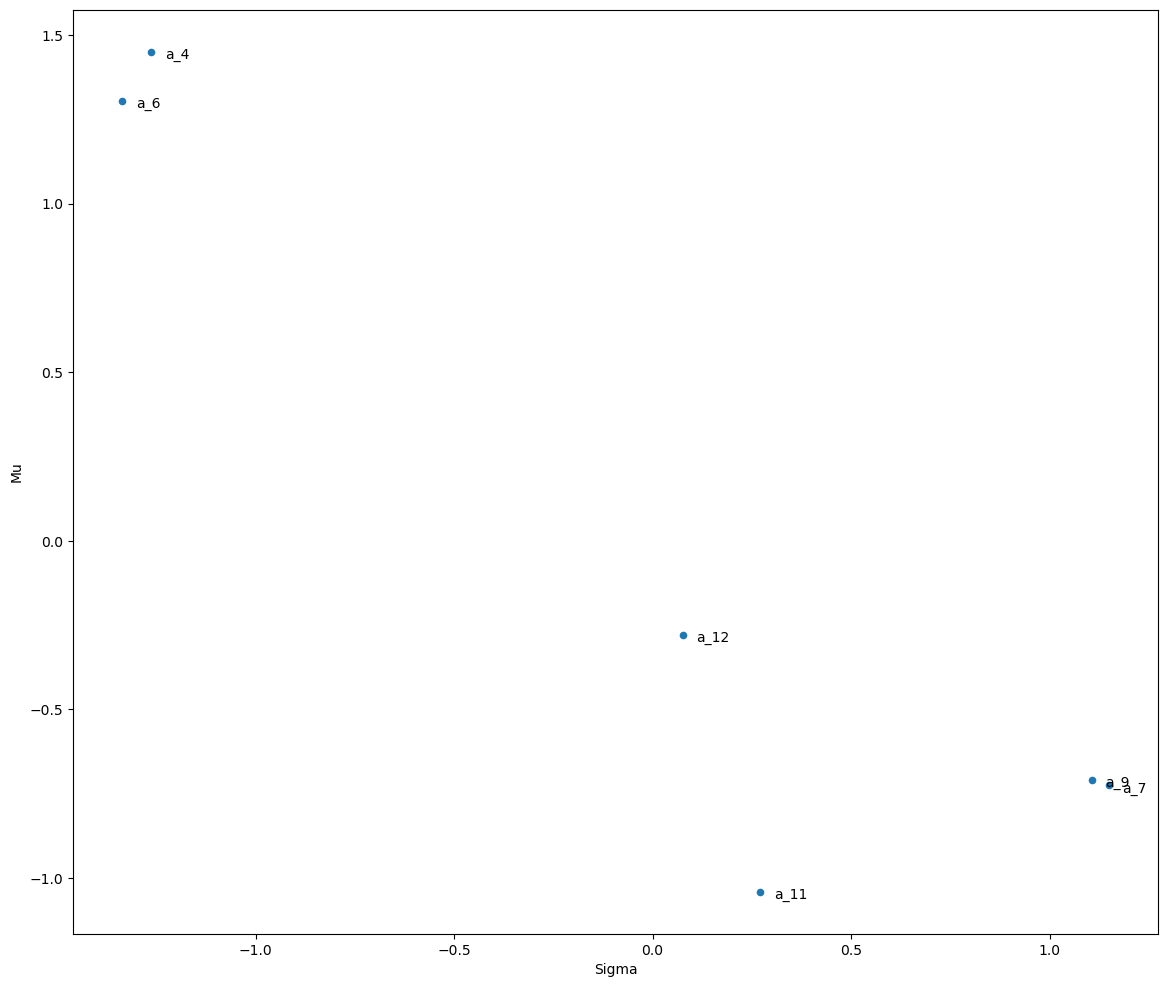

In [23]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [24]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_4', 'a_6']
PKF_2: ['a_12']
PKF_3: ['a_9', 'a_11']
PKF_4: ['a_7']


In [103]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 6, fronteira 1: resolvido.
alternative 6, fronteira 2: resolvido.
alternative 6, fronteira 3: resolvido.
alternative 6, fronteira 4: resolvido.


In [104]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=cluster_0.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$
a_4,0.000000,0.257026,0.317828,0.321553
a_6,0.000000,0.234042,0.294844,0.298569
a_7,-0.076320,-0.029924,-0.002333,0.000000
a_9,-0.074796,-0.028400,0.000000,0.003725
a_11,-0.046446,-0.000049,0.000000,0.029875
a_12,-0.046397,0.000000,0.060802,0.064527


In [105]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_4,1.000000,1.0
a_6,0.931389,2.0
a_7,0.000000,6.0
a_9,0.009061,5.0
a_11,0.091501,4.0
a_12,0.186580,3.0


In [106]:
#Aplicando ao cluster 2
cluster_2 = pd.read_excel("cluster2.xlsx", index_col=0)
cluster_2

,g_1,g_2,g_3,g_4,g_5
a_8,0.262746,0.565494,0.442039,0.684698,0.803969
a_10,0.646790,0.490562,0.359792,1.000000,0.613175


In [107]:
X = np.array(cluster_2) # decision matrix
m, n = X.shape

In [108]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (0.1,0.2, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (0.3, 0.4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

simulation 420 completed
simulation 421 completed
simulation 422 completed
simulation 423 completed
simulation 424 completed
simulation 425 completed
simulation 426 completed
simulation 427 completed
simulation 428 completed
simulation 429 completed
simulation 430 completed
simulation 431 completed
simulation 432 completed
simulation 433 completed
simulation 434 completed
simulation 435 completed
simulation 436 completed
simulation 437 completed
simulation 438 completed
simulation 439 completed
simulation 440 completed
simulation 441 completed
simulation 442 completed
simulation 443 completed
simulation 444 completed
simulation 445 completed
simulation 446 completed
simulation 447 completed
simulation 448 completed
simulation 449 completed
simulation 450 completed
simulation 451 completed
simulation 452 completed
simulation 453 completed
simulation 454 completed
simulation 455 completed
simulation 456 completed
simulation 457 completed
simulation 458 completed
simulation 459 completed


simulation 962 completed
simulation 963 completed
simulation 964 completed
simulation 965 completed
simulation 966 completed
simulation 967 completed
simulation 968 completed
simulation 969 completed
simulation 970 completed
simulation 971 completed
simulation 972 completed
simulation 973 completed
simulation 974 completed
simulation 975 completed
simulation 976 completed
simulation 977 completed
simulation 978 completed
simulation 979 completed
simulation 980 completed
simulation 981 completed
simulation 982 completed
simulation 983 completed
simulation 984 completed
simulation 985 completed
simulation 986 completed
simulation 987 completed
simulation 988 completed
simulation 989 completed
simulation 990 completed
simulation 991 completed
simulation 992 completed
simulation 993 completed
simulation 994 completed
simulation 995 completed
simulation 996 completed
simulation 997 completed
simulation 998 completed
simulation 999 completed
simulation 1000 completed
simulation 1001 complete

simulation 1595 completed
simulation 1596 completed
simulation 1597 completed
simulation 1598 completed
simulation 1599 completed
simulation 1600 completed
simulation 1601 completed
simulation 1602 completed
simulation 1603 completed
simulation 1604 completed
simulation 1605 completed
simulation 1606 completed
simulation 1607 completed
simulation 1608 completed
simulation 1609 completed
simulation 1610 completed
simulation 1611 completed
simulation 1612 completed
simulation 1613 completed
simulation 1614 completed
simulation 1615 completed
simulation 1616 completed
simulation 1617 completed
simulation 1618 completed
simulation 1619 completed
simulation 1620 completed
simulation 1621 completed
simulation 1622 completed
simulation 1623 completed
simulation 1624 completed
simulation 1625 completed
simulation 1626 completed
simulation 1627 completed
simulation 1628 completed
simulation 1629 completed
simulation 1630 completed
simulation 1631 completed
simulation 1632 completed
simulation 1

simulation 2184 completed
simulation 2185 completed
simulation 2186 completed
simulation 2187 completed
simulation 2188 completed
simulation 2189 completed
simulation 2190 completed
simulation 2191 completed
simulation 2192 completed
simulation 2193 completed
simulation 2194 completed
simulation 2195 completed
simulation 2196 completed
simulation 2197 completed
simulation 2198 completed
simulation 2199 completed
simulation 2200 completed
simulation 2201 completed
simulation 2202 completed
simulation 2203 completed
simulation 2204 completed
simulation 2205 completed
simulation 2206 completed
simulation 2207 completed
simulation 2208 completed
simulation 2209 completed
simulation 2210 completed
simulation 2211 completed
simulation 2212 completed
simulation 2213 completed
simulation 2214 completed
simulation 2215 completed
simulation 2216 completed
simulation 2217 completed
simulation 2218 completed
simulation 2219 completed
simulation 2220 completed
simulation 2221 completed
simulation 2

simulation 2809 completed
simulation 2810 completed
simulation 2811 completed
simulation 2812 completed
simulation 2813 completed
simulation 2814 completed
simulation 2815 completed
simulation 2816 completed
simulation 2817 completed
simulation 2818 completed
simulation 2819 completed
simulation 2820 completed
simulation 2821 completed
simulation 2822 completed
simulation 2823 completed
simulation 2824 completed
simulation 2825 completed
simulation 2826 completed
simulation 2827 completed
simulation 2828 completed
simulation 2829 completed
simulation 2830 completed
simulation 2831 completed
simulation 2832 completed
simulation 2833 completed
simulation 2834 completed
simulation 2835 completed
simulation 2836 completed
simulation 2837 completed
simulation 2838 completed
simulation 2839 completed
simulation 2840 completed
simulation 2841 completed
simulation 2842 completed
simulation 2843 completed
simulation 2844 completed
simulation 2845 completed
simulation 2846 completed
simulation 2

simulation 3403 completed
simulation 3404 completed
simulation 3405 completed
simulation 3406 completed
simulation 3407 completed
simulation 3408 completed
simulation 3409 completed
simulation 3410 completed
simulation 3411 completed
simulation 3412 completed
simulation 3413 completed
simulation 3414 completed
simulation 3415 completed
simulation 3416 completed
simulation 3417 completed
simulation 3418 completed
simulation 3419 completed
simulation 3420 completed
simulation 3421 completed
simulation 3422 completed
simulation 3423 completed
simulation 3424 completed
simulation 3425 completed
simulation 3426 completed
simulation 3427 completed
simulation 3428 completed
simulation 3429 completed
simulation 3430 completed
simulation 3431 completed
simulation 3432 completed
simulation 3433 completed
simulation 3434 completed
simulation 3435 completed
simulation 3436 completed
simulation 3437 completed
simulation 3438 completed
simulation 3439 completed
simulation 3440 completed
simulation 3

simulation 3899 completed
simulation 3900 completed
simulation 3901 completed
simulation 3902 completed
simulation 3903 completed
simulation 3904 completed
simulation 3905 completed
simulation 3906 completed
simulation 3907 completed
simulation 3908 completed
simulation 3909 completed
simulation 3910 completed
simulation 3911 completed
simulation 3912 completed
simulation 3913 completed
simulation 3914 completed
simulation 3915 completed
simulation 3916 completed
simulation 3917 completed
simulation 3918 completed
simulation 3919 completed
simulation 3920 completed
simulation 3921 completed
simulation 3922 completed
simulation 3923 completed
simulation 3924 completed
simulation 3925 completed
simulation 3926 completed
simulation 3927 completed
simulation 3928 completed
simulation 3929 completed
simulation 3930 completed
simulation 3931 completed
simulation 3932 completed
simulation 3933 completed
simulation 3934 completed
simulation 3935 completed
simulation 3936 completed
simulation 3

simulation 4446 completed
simulation 4447 completed
simulation 4448 completed
simulation 4449 completed
simulation 4450 completed
simulation 4451 completed
simulation 4452 completed
simulation 4453 completed
simulation 4454 completed
simulation 4455 completed
simulation 4456 completed
simulation 4457 completed
simulation 4458 completed
simulation 4459 completed
simulation 4460 completed
simulation 4461 completed
simulation 4462 completed
simulation 4463 completed
simulation 4464 completed
simulation 4465 completed
simulation 4466 completed
simulation 4467 completed
simulation 4468 completed
simulation 4469 completed
simulation 4470 completed
simulation 4471 completed
simulation 4472 completed
simulation 4473 completed
simulation 4474 completed
simulation 4475 completed
simulation 4476 completed
simulation 4477 completed
simulation 4478 completed
simulation 4479 completed
simulation 4480 completed
simulation 4481 completed
simulation 4482 completed
simulation 4483 completed
simulation 4

simulation 5006 completed
simulation 5007 completed
simulation 5008 completed
simulation 5009 completed
simulation 5010 completed
simulation 5011 completed
simulation 5012 completed
simulation 5013 completed
simulation 5014 completed
simulation 5015 completed
simulation 5016 completed
simulation 5017 completed
simulation 5018 completed
simulation 5019 completed
simulation 5020 completed
simulation 5021 completed
simulation 5022 completed
simulation 5023 completed
simulation 5024 completed
simulation 5025 completed
simulation 5026 completed
simulation 5027 completed
simulation 5028 completed
simulation 5029 completed
simulation 5030 completed
simulation 5031 completed
simulation 5032 completed
simulation 5033 completed
simulation 5034 completed
simulation 5035 completed
simulation 5036 completed
simulation 5037 completed
simulation 5038 completed
simulation 5039 completed
simulation 5040 completed
simulation 5041 completed
simulation 5042 completed
simulation 5043 completed
simulation 5

simulation 5550 completed
simulation 5551 completed
simulation 5552 completed
simulation 5553 completed
simulation 5554 completed
simulation 5555 completed
simulation 5556 completed
simulation 5557 completed
simulation 5558 completed
simulation 5559 completed
simulation 5560 completed
simulation 5561 completed
simulation 5562 completed
simulation 5563 completed
simulation 5564 completed
simulation 5565 completed
simulation 5566 completed
simulation 5567 completed
simulation 5568 completed
simulation 5569 completed
simulation 5570 completed
simulation 5571 completed
simulation 5572 completed
simulation 5573 completed
simulation 5574 completed
simulation 5575 completed
simulation 5576 completed
simulation 5577 completed
simulation 5578 completed
simulation 5579 completed
simulation 5580 completed
simulation 5581 completed
simulation 5582 completed
simulation 5583 completed
simulation 5584 completed
simulation 5585 completed
simulation 5586 completed
simulation 5587 completed
simulation 5

simulation 6157 completed
simulation 6158 completed
simulation 6159 completed
simulation 6160 completed
simulation 6161 completed
simulation 6162 completed
simulation 6163 completed
simulation 6164 completed
simulation 6165 completed
simulation 6166 completed
simulation 6167 completed
simulation 6168 completed
simulation 6169 completed
simulation 6170 completed
simulation 6171 completed
simulation 6172 completed
simulation 6173 completed
simulation 6174 completed
simulation 6175 completed
simulation 6176 completed
simulation 6177 completed
simulation 6178 completed
simulation 6179 completed
simulation 6180 completed
simulation 6181 completed
simulation 6182 completed
simulation 6183 completed
simulation 6184 completed
simulation 6185 completed
simulation 6186 completed
simulation 6187 completed
simulation 6188 completed
simulation 6189 completed
simulation 6190 completed
simulation 6191 completed
simulation 6192 completed
simulation 6193 completed
simulation 6194 completed
simulation 6

simulation 6709 completed
simulation 6710 completed
simulation 6711 completed
simulation 6712 completed
simulation 6713 completed
simulation 6714 completed
simulation 6715 completed
simulation 6716 completed
simulation 6717 completed
simulation 6718 completed
simulation 6719 completed
simulation 6720 completed
simulation 6721 completed
simulation 6722 completed
simulation 6723 completed
simulation 6724 completed
simulation 6725 completed
simulation 6726 completed
simulation 6727 completed
simulation 6728 completed
simulation 6729 completed
simulation 6730 completed
simulation 6731 completed
simulation 6732 completed
simulation 6733 completed
simulation 6734 completed
simulation 6735 completed
simulation 6736 completed
simulation 6737 completed
simulation 6738 completed
simulation 6739 completed
simulation 6740 completed
simulation 6741 completed
simulation 6742 completed
simulation 6743 completed
simulation 6744 completed
simulation 6745 completed
simulation 6746 completed
simulation 6

simulation 7284 completed
simulation 7285 completed
simulation 7286 completed
simulation 7287 completed
simulation 7288 completed
simulation 7289 completed
simulation 7290 completed
simulation 7291 completed
simulation 7292 completed
simulation 7293 completed
simulation 7294 completed
simulation 7295 completed
simulation 7296 completed
simulation 7297 completed
simulation 7298 completed
simulation 7299 completed
simulation 7300 completed
simulation 7301 completed
simulation 7302 completed
simulation 7303 completed
simulation 7304 completed
simulation 7305 completed
simulation 7306 completed
simulation 7307 completed
simulation 7308 completed
simulation 7309 completed
simulation 7310 completed
simulation 7311 completed
simulation 7312 completed
simulation 7313 completed
simulation 7314 completed
simulation 7315 completed
simulation 7316 completed
simulation 7317 completed
simulation 7318 completed
simulation 7319 completed
simulation 7320 completed
simulation 7321 completed
simulation 7

simulation 7620 completed
simulation 7621 completed
simulation 7622 completed
simulation 7623 completed
simulation 7624 completed
simulation 7625 completed
simulation 7626 completed
simulation 7627 completed
simulation 7628 completed
simulation 7629 completed
simulation 7630 completed
simulation 7631 completed
simulation 7632 completed
simulation 7633 completed
simulation 7634 completed
simulation 7635 completed
simulation 7636 completed
simulation 7637 completed
simulation 7638 completed
simulation 7639 completed
simulation 7640 completed
simulation 7641 completed
simulation 7642 completed
simulation 7643 completed
simulation 7644 completed
simulation 7645 completed
simulation 7646 completed
simulation 7647 completed
simulation 7648 completed
simulation 7649 completed
simulation 7650 completed
simulation 7651 completed
simulation 7652 completed
simulation 7653 completed
simulation 7654 completed
simulation 7655 completed
simulation 7656 completed
simulation 7657 completed
simulation 7

simulation 7953 completed
simulation 7954 completed
simulation 7955 completed
simulation 7956 completed
simulation 7957 completed
simulation 7958 completed
simulation 7959 completed
simulation 7960 completed
simulation 7961 completed
simulation 7962 completed
simulation 7963 completed
simulation 7964 completed
simulation 7965 completed
simulation 7966 completed
simulation 7967 completed
simulation 7968 completed
simulation 7969 completed
simulation 7970 completed
simulation 7971 completed
simulation 7972 completed
simulation 7973 completed
simulation 7974 completed
simulation 7975 completed
simulation 7976 completed
simulation 7977 completed
simulation 7978 completed
simulation 7979 completed
simulation 7980 completed
simulation 7981 completed
simulation 7982 completed
simulation 7983 completed
simulation 7984 completed
simulation 7985 completed
simulation 7986 completed
simulation 7987 completed
simulation 7988 completed
simulation 7989 completed
simulation 7990 completed
simulation 7

simulation 8503 completed
simulation 8504 completed
simulation 8505 completed
simulation 8506 completed
simulation 8507 completed
simulation 8508 completed
simulation 8509 completed
simulation 8510 completed
simulation 8511 completed
simulation 8512 completed
simulation 8513 completed
simulation 8514 completed
simulation 8515 completed
simulation 8516 completed
simulation 8517 completed
simulation 8518 completed
simulation 8519 completed
simulation 8520 completed
simulation 8521 completed
simulation 8522 completed
simulation 8523 completed
simulation 8524 completed
simulation 8525 completed
simulation 8526 completed
simulation 8527 completed
simulation 8528 completed
simulation 8529 completed
simulation 8530 completed
simulation 8531 completed
simulation 8532 completed
simulation 8533 completed
simulation 8534 completed
simulation 8535 completed
simulation 8536 completed
simulation 8537 completed
simulation 8538 completed
simulation 8539 completed
simulation 8540 completed
simulation 8

simulation 9080 completed
simulation 9081 completed
simulation 9082 completed
simulation 9083 completed
simulation 9084 completed
simulation 9085 completed
simulation 9086 completed
simulation 9087 completed
simulation 9088 completed
simulation 9089 completed
simulation 9090 completed
simulation 9091 completed
simulation 9092 completed
simulation 9093 completed
simulation 9094 completed
simulation 9095 completed
simulation 9096 completed
simulation 9097 completed
simulation 9098 completed
simulation 9099 completed
simulation 9100 completed
simulation 9101 completed
simulation 9102 completed
simulation 9103 completed
simulation 9104 completed
simulation 9105 completed
simulation 9106 completed
simulation 9107 completed
simulation 9108 completed
simulation 9109 completed
simulation 9110 completed
simulation 9111 completed
simulation 9112 completed
simulation 9113 completed
simulation 9114 completed
simulation 9115 completed
simulation 9116 completed
simulation 9117 completed
simulation 9

simulation 9671 completed
simulation 9672 completed
simulation 9673 completed
simulation 9674 completed
simulation 9675 completed
simulation 9676 completed
simulation 9677 completed
simulation 9678 completed
simulation 9679 completed
simulation 9680 completed
simulation 9681 completed
simulation 9682 completed
simulation 9683 completed
simulation 9684 completed
simulation 9685 completed
simulation 9686 completed
simulation 9687 completed
simulation 9688 completed
simulation 9689 completed
simulation 9690 completed
simulation 9691 completed
simulation 9692 completed
simulation 9693 completed
simulation 9694 completed
simulation 9695 completed
simulation 9696 completed
simulation 9697 completed
simulation 9698 completed
simulation 9699 completed
simulation 9700 completed
simulation 9701 completed
simulation 9702 completed
simulation 9703 completed
simulation 9704 completed
simulation 9705 completed
simulation 9706 completed
simulation 9707 completed
simulation 9708 completed
simulation 9

In [109]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= cluster_2.index)
Sigma_Mu_df

,Sigma,Mu
a_8,0.20327,-0.329309
a_10,0.20327,0.329309


In [110]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = cluster_2.index)
Sigma_Mu_df_transformed

,Sigma,Mu
a_8,0.0,-1.0
a_10,0.0,1.0


C:\Users\igor2\AppData\Local\Temp\ipykernel_9248\188652928.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


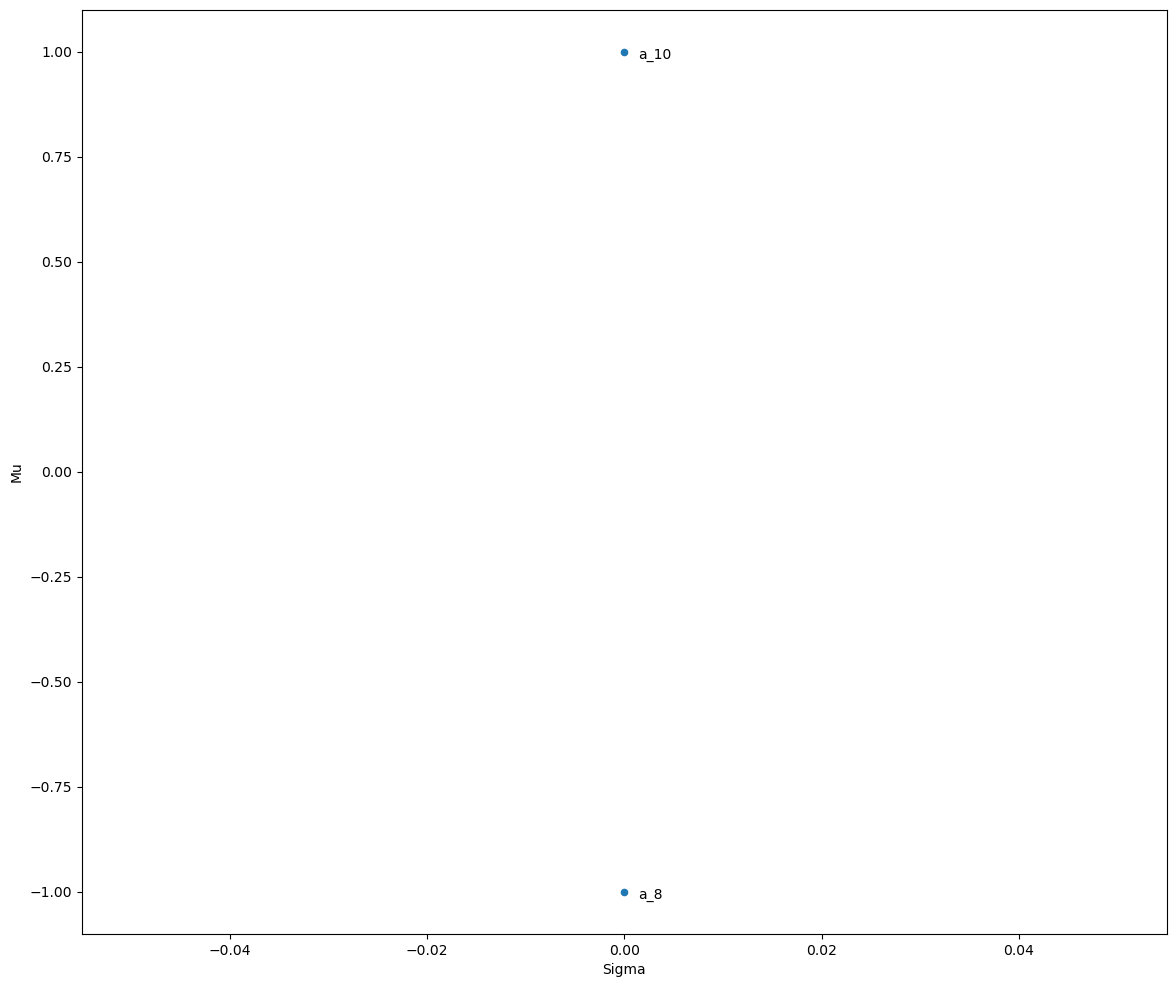

In [111]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [112]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_10']
PKF_2: ['a_8']


In [113]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.


In [115]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=cluster_2.index)

,$PKF_0$,$PKF_1$
a_8,0.0,0.000000
a_10,0.0,0.658617


In [116]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_8,0.0,2.0
a_10,1.0,1.0


In [117]:
#Aplicando ao cluster 3
cluster_3 = pd.read_excel("cluster3.xlsx", index_col=0)
cluster_3

,g_1,g_2,g_3,g_4,g_5
a_1,0.376845,0.820458,0.451274,0.365887,0.544659
a_2,0.647962,0.899458,0.800210,0.310523,0.370057
a_5,0.645019,0.962607,0.686450,0.409713,0.552806
a_13,0.690371,0.973830,0.437406,0.447010,0.234913
a_14,0.647627,0.659211,0.261454,0.000000,0.358886


In [118]:
X = np.array(cluster_3) # decision matrix
m, n = X.shape

In [119]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (0.1,0.2, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (0.3, 0.4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

simulation 512 completed
simulation 513 completed
simulation 514 completed
simulation 515 completed
simulation 516 completed
simulation 517 completed
simulation 518 completed
simulation 519 completed
simulation 520 completed
simulation 521 completed
simulation 522 completed
simulation 523 completed
simulation 524 completed
simulation 525 completed
simulation 526 completed
simulation 527 completed
simulation 528 completed
simulation 529 completed
simulation 530 completed
simulation 531 completed
simulation 532 completed
simulation 533 completed
simulation 534 completed
simulation 535 completed
simulation 536 completed
simulation 537 completed
simulation 538 completed
simulation 539 completed
simulation 540 completed
simulation 541 completed
simulation 542 completed
simulation 543 completed
simulation 544 completed
simulation 545 completed
simulation 546 completed
simulation 547 completed
simulation 548 completed
simulation 549 completed
simulation 550 completed
simulation 551 completed


simulation 872 completed
simulation 873 completed
simulation 874 completed
simulation 875 completed
simulation 876 completed
simulation 877 completed
simulation 878 completed
simulation 879 completed
simulation 880 completed
simulation 881 completed
simulation 882 completed
simulation 883 completed
simulation 884 completed
simulation 885 completed
simulation 886 completed
simulation 887 completed
simulation 888 completed
simulation 889 completed
simulation 890 completed
simulation 891 completed
simulation 892 completed
simulation 893 completed
simulation 894 completed
simulation 895 completed
simulation 896 completed
simulation 897 completed
simulation 898 completed
simulation 899 completed
simulation 900 completed
simulation 901 completed
simulation 902 completed
simulation 903 completed
simulation 904 completed
simulation 905 completed
simulation 906 completed
simulation 907 completed
simulation 908 completed
simulation 909 completed
simulation 910 completed
simulation 911 completed


simulation 1221 completed
simulation 1222 completed
simulation 1223 completed
simulation 1224 completed
simulation 1225 completed
simulation 1226 completed
simulation 1227 completed
simulation 1228 completed
simulation 1229 completed
simulation 1230 completed
simulation 1231 completed
simulation 1232 completed
simulation 1233 completed
simulation 1234 completed
simulation 1235 completed
simulation 1236 completed
simulation 1237 completed
simulation 1238 completed
simulation 1239 completed
simulation 1240 completed
simulation 1241 completed
simulation 1242 completed
simulation 1243 completed
simulation 1244 completed
simulation 1245 completed
simulation 1246 completed
simulation 1247 completed
simulation 1248 completed
simulation 1249 completed
simulation 1250 completed
simulation 1251 completed
simulation 1252 completed
simulation 1253 completed
simulation 1254 completed
simulation 1255 completed
simulation 1256 completed
simulation 1257 completed
simulation 1258 completed
simulation 1

simulation 1552 completed
simulation 1553 completed
simulation 1554 completed
simulation 1555 completed
simulation 1556 completed
simulation 1557 completed
simulation 1558 completed
simulation 1559 completed
simulation 1560 completed
simulation 1561 completed
simulation 1562 completed
simulation 1563 completed
simulation 1564 completed
simulation 1565 completed
simulation 1566 completed
simulation 1567 completed
simulation 1568 completed
simulation 1569 completed
simulation 1570 completed
simulation 1571 completed
simulation 1572 completed
simulation 1573 completed
simulation 1574 completed
simulation 1575 completed
simulation 1576 completed
simulation 1577 completed
simulation 1578 completed
simulation 1579 completed
simulation 1580 completed
simulation 1581 completed
simulation 1582 completed
simulation 1583 completed
simulation 1584 completed
simulation 1585 completed
simulation 1586 completed
simulation 1587 completed
simulation 1588 completed
simulation 1589 completed
simulation 1

simulation 1899 completed
simulation 1900 completed
simulation 1901 completed
simulation 1902 completed
simulation 1903 completed
simulation 1904 completed
simulation 1905 completed
simulation 1906 completed
simulation 1907 completed
simulation 1908 completed
simulation 1909 completed
simulation 1910 completed
simulation 1911 completed
simulation 1912 completed
simulation 1913 completed
simulation 1914 completed
simulation 1915 completed
simulation 1916 completed
simulation 1917 completed
simulation 1918 completed
simulation 1919 completed
simulation 1920 completed
simulation 1921 completed
simulation 1922 completed
simulation 1923 completed
simulation 1924 completed
simulation 1925 completed
simulation 1926 completed
simulation 1927 completed
simulation 1928 completed
simulation 1929 completed
simulation 1930 completed
simulation 1931 completed
simulation 1932 completed
simulation 1933 completed
simulation 1934 completed
simulation 1935 completed
simulation 1936 completed
simulation 1

simulation 2223 completed
simulation 2224 completed
simulation 2225 completed
simulation 2226 completed
simulation 2227 completed
simulation 2228 completed
simulation 2229 completed
simulation 2230 completed
simulation 2231 completed
simulation 2232 completed
simulation 2233 completed
simulation 2234 completed
simulation 2235 completed
simulation 2236 completed
simulation 2237 completed
simulation 2238 completed
simulation 2239 completed
simulation 2240 completed
simulation 2241 completed
simulation 2242 completed
simulation 2243 completed
simulation 2244 completed
simulation 2245 completed
simulation 2246 completed
simulation 2247 completed
simulation 2248 completed
simulation 2249 completed
simulation 2250 completed
simulation 2251 completed
simulation 2252 completed
simulation 2253 completed
simulation 2254 completed
simulation 2255 completed
simulation 2256 completed
simulation 2257 completed
simulation 2258 completed
simulation 2259 completed
simulation 2260 completed
simulation 2

simulation 2605 completed
simulation 2606 completed
simulation 2607 completed
simulation 2608 completed
simulation 2609 completed
simulation 2610 completed
simulation 2611 completed
simulation 2612 completed
simulation 2613 completed
simulation 2614 completed
simulation 2615 completed
simulation 2616 completed
simulation 2617 completed
simulation 2618 completed
simulation 2619 completed
simulation 2620 completed
simulation 2621 completed
simulation 2622 completed
simulation 2623 completed
simulation 2624 completed
simulation 2625 completed
simulation 2626 completed
simulation 2627 completed
simulation 2628 completed
simulation 2629 completed
simulation 2630 completed
simulation 2631 completed
simulation 2632 completed
simulation 2633 completed
simulation 2634 completed
simulation 2635 completed
simulation 2636 completed
simulation 2637 completed
simulation 2638 completed
simulation 2639 completed
simulation 2640 completed
simulation 2641 completed
simulation 2642 completed
simulation 2

simulation 2991 completed
simulation 2992 completed
simulation 2993 completed
simulation 2994 completed
simulation 2995 completed
simulation 2996 completed
simulation 2997 completed
simulation 2998 completed
simulation 2999 completed
simulation 3000 completed
simulation 3001 completed
simulation 3002 completed
simulation 3003 completed
simulation 3004 completed
simulation 3005 completed
simulation 3006 completed
simulation 3007 completed
simulation 3008 completed
simulation 3009 completed
simulation 3010 completed
simulation 3011 completed
simulation 3012 completed
simulation 3013 completed
simulation 3014 completed
simulation 3015 completed
simulation 3016 completed
simulation 3017 completed
simulation 3018 completed
simulation 3019 completed
simulation 3020 completed
simulation 3021 completed
simulation 3022 completed
simulation 3023 completed
simulation 3024 completed
simulation 3025 completed
simulation 3026 completed
simulation 3027 completed
simulation 3028 completed
simulation 3

simulation 3470 completed
simulation 3471 completed
simulation 3472 completed
simulation 3473 completed
simulation 3474 completed
simulation 3475 completed
simulation 3476 completed
simulation 3477 completed
simulation 3478 completed
simulation 3479 completed
simulation 3480 completed
simulation 3481 completed
simulation 3482 completed
simulation 3483 completed
simulation 3484 completed
simulation 3485 completed
simulation 3486 completed
simulation 3487 completed
simulation 3488 completed
simulation 3489 completed
simulation 3490 completed
simulation 3491 completed
simulation 3492 completed
simulation 3493 completed
simulation 3494 completed
simulation 3495 completed
simulation 3496 completed
simulation 3497 completed
simulation 3498 completed
simulation 3499 completed
simulation 3500 completed
simulation 3501 completed
simulation 3502 completed
simulation 3503 completed
simulation 3504 completed
simulation 3505 completed
simulation 3506 completed
simulation 3507 completed
simulation 3

simulation 3801 completed
simulation 3802 completed
simulation 3803 completed
simulation 3804 completed
simulation 3805 completed
simulation 3806 completed
simulation 3807 completed
simulation 3808 completed
simulation 3809 completed
simulation 3810 completed
simulation 3811 completed
simulation 3812 completed
simulation 3813 completed
simulation 3814 completed
simulation 3815 completed
simulation 3816 completed
simulation 3817 completed
simulation 3818 completed
simulation 3819 completed
simulation 3820 completed
simulation 3821 completed
simulation 3822 completed
simulation 3823 completed
simulation 3824 completed
simulation 3825 completed
simulation 3826 completed
simulation 3827 completed
simulation 3828 completed
simulation 3829 completed
simulation 3830 completed
simulation 3831 completed
simulation 3832 completed
simulation 3833 completed
simulation 3834 completed
simulation 3835 completed
simulation 3836 completed
simulation 3837 completed
simulation 3838 completed
simulation 3

simulation 4190 completed
simulation 4191 completed
simulation 4192 completed
simulation 4193 completed
simulation 4194 completed
simulation 4195 completed
simulation 4196 completed
simulation 4197 completed
simulation 4198 completed
simulation 4199 completed
simulation 4200 completed
simulation 4201 completed
simulation 4202 completed
simulation 4203 completed
simulation 4204 completed
simulation 4205 completed
simulation 4206 completed
simulation 4207 completed
simulation 4208 completed
simulation 4209 completed
simulation 4210 completed
simulation 4211 completed
simulation 4212 completed
simulation 4213 completed
simulation 4214 completed
simulation 4215 completed
simulation 4216 completed
simulation 4217 completed
simulation 4218 completed
simulation 4219 completed
simulation 4220 completed
simulation 4221 completed
simulation 4222 completed
simulation 4223 completed
simulation 4224 completed
simulation 4225 completed
simulation 4226 completed
simulation 4227 completed
simulation 4

simulation 4513 completed
simulation 4514 completed
simulation 4515 completed
simulation 4516 completed
simulation 4517 completed
simulation 4518 completed
simulation 4519 completed
simulation 4520 completed
simulation 4521 completed
simulation 4522 completed
simulation 4523 completed
simulation 4524 completed
simulation 4525 completed
simulation 4526 completed
simulation 4527 completed
simulation 4528 completed
simulation 4529 completed
simulation 4530 completed
simulation 4531 completed
simulation 4532 completed
simulation 4533 completed
simulation 4534 completed
simulation 4535 completed
simulation 4536 completed
simulation 4537 completed
simulation 4538 completed
simulation 4539 completed
simulation 4540 completed
simulation 4541 completed
simulation 4542 completed
simulation 4543 completed
simulation 4544 completed
simulation 4545 completed
simulation 4546 completed
simulation 4547 completed
simulation 4548 completed
simulation 4549 completed
simulation 4550 completed
simulation 4

simulation 4872 completed
simulation 4873 completed
simulation 4874 completed
simulation 4875 completed
simulation 4876 completed
simulation 4877 completed
simulation 4878 completed
simulation 4879 completed
simulation 4880 completed
simulation 4881 completed
simulation 4882 completed
simulation 4883 completed
simulation 4884 completed
simulation 4885 completed
simulation 4886 completed
simulation 4887 completed
simulation 4888 completed
simulation 4889 completed
simulation 4890 completed
simulation 4891 completed
simulation 4892 completed
simulation 4893 completed
simulation 4894 completed
simulation 4895 completed
simulation 4896 completed
simulation 4897 completed
simulation 4898 completed
simulation 4899 completed
simulation 4900 completed
simulation 4901 completed
simulation 4902 completed
simulation 4903 completed
simulation 4904 completed
simulation 4905 completed
simulation 4906 completed
simulation 4907 completed
simulation 4908 completed
simulation 4909 completed
simulation 4

simulation 5247 completed
simulation 5248 completed
simulation 5249 completed
simulation 5250 completed
simulation 5251 completed
simulation 5252 completed
simulation 5253 completed
simulation 5254 completed
simulation 5255 completed
simulation 5256 completed
simulation 5257 completed
simulation 5258 completed
simulation 5259 completed
simulation 5260 completed
simulation 5261 completed
simulation 5262 completed
simulation 5263 completed
simulation 5264 completed
simulation 5265 completed
simulation 5266 completed
simulation 5267 completed
simulation 5268 completed
simulation 5269 completed
simulation 5270 completed
simulation 5271 completed
simulation 5272 completed
simulation 5273 completed
simulation 5274 completed
simulation 5275 completed
simulation 5276 completed
simulation 5277 completed
simulation 5278 completed
simulation 5279 completed
simulation 5280 completed
simulation 5281 completed
simulation 5282 completed
simulation 5283 completed
simulation 5284 completed
simulation 5

simulation 5603 completed
simulation 5604 completed
simulation 5605 completed
simulation 5606 completed
simulation 5607 completed
simulation 5608 completed
simulation 5609 completed
simulation 5610 completed
simulation 5611 completed
simulation 5612 completed
simulation 5613 completed
simulation 5614 completed
simulation 5615 completed
simulation 5616 completed
simulation 5617 completed
simulation 5618 completed
simulation 5619 completed
simulation 5620 completed
simulation 5621 completed
simulation 5622 completed
simulation 5623 completed
simulation 5624 completed
simulation 5625 completed
simulation 5626 completed
simulation 5627 completed
simulation 5628 completed
simulation 5629 completed
simulation 5630 completed
simulation 5631 completed
simulation 5632 completed
simulation 5633 completed
simulation 5634 completed
simulation 5635 completed
simulation 5636 completed
simulation 5637 completed
simulation 5638 completed
simulation 5639 completed
simulation 5640 completed
simulation 5

simulation 5990 completed
simulation 5991 completed
simulation 5992 completed
simulation 5993 completed
simulation 5994 completed
simulation 5995 completed
simulation 5996 completed
simulation 5997 completed
simulation 5998 completed
simulation 5999 completed
simulation 6000 completed
simulation 6001 completed
simulation 6002 completed
simulation 6003 completed
simulation 6004 completed
simulation 6005 completed
simulation 6006 completed
simulation 6007 completed
simulation 6008 completed
simulation 6009 completed
simulation 6010 completed
simulation 6011 completed
simulation 6012 completed
simulation 6013 completed
simulation 6014 completed
simulation 6015 completed
simulation 6016 completed
simulation 6017 completed
simulation 6018 completed
simulation 6019 completed
simulation 6020 completed
simulation 6021 completed
simulation 6022 completed
simulation 6023 completed
simulation 6024 completed
simulation 6025 completed
simulation 6026 completed
simulation 6027 completed
simulation 6

simulation 6338 completed
simulation 6339 completed
simulation 6340 completed
simulation 6341 completed
simulation 6342 completed
simulation 6343 completed
simulation 6344 completed
simulation 6345 completed
simulation 6346 completed
simulation 6347 completed
simulation 6348 completed
simulation 6349 completed
simulation 6350 completed
simulation 6351 completed
simulation 6352 completed
simulation 6353 completed
simulation 6354 completed
simulation 6355 completed
simulation 6356 completed
simulation 6357 completed
simulation 6358 completed
simulation 6359 completed
simulation 6360 completed
simulation 6361 completed
simulation 6362 completed
simulation 6363 completed
simulation 6364 completed
simulation 6365 completed
simulation 6366 completed
simulation 6367 completed
simulation 6368 completed
simulation 6369 completed
simulation 6370 completed
simulation 6371 completed
simulation 6372 completed
simulation 6373 completed
simulation 6374 completed
simulation 6375 completed
simulation 6

simulation 6727 completed
simulation 6728 completed
simulation 6729 completed
simulation 6730 completed
simulation 6731 completed
simulation 6732 completed
simulation 6733 completed
simulation 6734 completed
simulation 6735 completed
simulation 6736 completed
simulation 6737 completed
simulation 6738 completed
simulation 6739 completed
simulation 6740 completed
simulation 6741 completed
simulation 6742 completed
simulation 6743 completed
simulation 6744 completed
simulation 6745 completed
simulation 6746 completed
simulation 6747 completed
simulation 6748 completed
simulation 6749 completed
simulation 6750 completed
simulation 6751 completed
simulation 6752 completed
simulation 6753 completed
simulation 6754 completed
simulation 6755 completed
simulation 6756 completed
simulation 6757 completed
simulation 6758 completed
simulation 6759 completed
simulation 6760 completed
simulation 6761 completed
simulation 6762 completed
simulation 6763 completed
simulation 6764 completed
simulation 6

simulation 7099 completed
simulation 7100 completed
simulation 7101 completed
simulation 7102 completed
simulation 7103 completed
simulation 7104 completed
simulation 7105 completed
simulation 7106 completed
simulation 7107 completed
simulation 7108 completed
simulation 7109 completed
simulation 7110 completed
simulation 7111 completed
simulation 7112 completed
simulation 7113 completed
simulation 7114 completed
simulation 7115 completed
simulation 7116 completed
simulation 7117 completed
simulation 7118 completed
simulation 7119 completed
simulation 7120 completed
simulation 7121 completed
simulation 7122 completed
simulation 7123 completed
simulation 7124 completed
simulation 7125 completed
simulation 7126 completed
simulation 7127 completed
simulation 7128 completed
simulation 7129 completed
simulation 7130 completed
simulation 7131 completed
simulation 7132 completed
simulation 7133 completed
simulation 7134 completed
simulation 7135 completed
simulation 7136 completed
simulation 7

simulation 7490 completed
simulation 7491 completed
simulation 7492 completed
simulation 7493 completed
simulation 7494 completed
simulation 7495 completed
simulation 7496 completed
simulation 7497 completed
simulation 7498 completed
simulation 7499 completed
simulation 7500 completed
simulation 7501 completed
simulation 7502 completed
simulation 7503 completed
simulation 7504 completed
simulation 7505 completed
simulation 7506 completed
simulation 7507 completed
simulation 7508 completed
simulation 7509 completed
simulation 7510 completed
simulation 7511 completed
simulation 7512 completed
simulation 7513 completed
simulation 7514 completed
simulation 7515 completed
simulation 7516 completed
simulation 7517 completed
simulation 7518 completed
simulation 7519 completed
simulation 7520 completed
simulation 7521 completed
simulation 7522 completed
simulation 7523 completed
simulation 7524 completed
simulation 7525 completed
simulation 7526 completed
simulation 7527 completed
simulation 7

simulation 7864 completed
simulation 7865 completed
simulation 7866 completed
simulation 7867 completed
simulation 7868 completed
simulation 7869 completed
simulation 7870 completed
simulation 7871 completed
simulation 7872 completed
simulation 7873 completed
simulation 7874 completed
simulation 7875 completed
simulation 7876 completed
simulation 7877 completed
simulation 7878 completed
simulation 7879 completed
simulation 7880 completed
simulation 7881 completed
simulation 7882 completed
simulation 7883 completed
simulation 7884 completed
simulation 7885 completed
simulation 7886 completed
simulation 7887 completed
simulation 7888 completed
simulation 7889 completed
simulation 7890 completed
simulation 7891 completed
simulation 7892 completed
simulation 7893 completed
simulation 7894 completed
simulation 7895 completed
simulation 7896 completed
simulation 7897 completed
simulation 7898 completed
simulation 7899 completed
simulation 7900 completed
simulation 7901 completed
simulation 7

simulation 8241 completed
simulation 8242 completed
simulation 8243 completed
simulation 8244 completed
simulation 8245 completed
simulation 8246 completed
simulation 8247 completed
simulation 8248 completed
simulation 8249 completed
simulation 8250 completed
simulation 8251 completed
simulation 8252 completed
simulation 8253 completed
simulation 8254 completed
simulation 8255 completed
simulation 8256 completed
simulation 8257 completed
simulation 8258 completed
simulation 8259 completed
simulation 8260 completed
simulation 8261 completed
simulation 8262 completed
simulation 8263 completed
simulation 8264 completed
simulation 8265 completed
simulation 8266 completed
simulation 8267 completed
simulation 8268 completed
simulation 8269 completed
simulation 8270 completed
simulation 8271 completed
simulation 8272 completed
simulation 8273 completed
simulation 8274 completed
simulation 8275 completed
simulation 8276 completed
simulation 8277 completed
simulation 8278 completed
simulation 8

simulation 8623 completed
simulation 8624 completed
simulation 8625 completed
simulation 8626 completed
simulation 8627 completed
simulation 8628 completed
simulation 8629 completed
simulation 8630 completed
simulation 8631 completed
simulation 8632 completed
simulation 8633 completed
simulation 8634 completed
simulation 8635 completed
simulation 8636 completed
simulation 8637 completed
simulation 8638 completed
simulation 8639 completed
simulation 8640 completed
simulation 8641 completed
simulation 8642 completed
simulation 8643 completed
simulation 8644 completed
simulation 8645 completed
simulation 8646 completed
simulation 8647 completed
simulation 8648 completed
simulation 8649 completed
simulation 8650 completed
simulation 8651 completed
simulation 8652 completed
simulation 8653 completed
simulation 8654 completed
simulation 8655 completed
simulation 8656 completed
simulation 8657 completed
simulation 8658 completed
simulation 8659 completed
simulation 8660 completed
simulation 8

simulation 8991 completed
simulation 8992 completed
simulation 8993 completed
simulation 8994 completed
simulation 8995 completed
simulation 8996 completed
simulation 8997 completed
simulation 8998 completed
simulation 8999 completed
simulation 9000 completed
simulation 9001 completed
simulation 9002 completed
simulation 9003 completed
simulation 9004 completed
simulation 9005 completed
simulation 9006 completed
simulation 9007 completed
simulation 9008 completed
simulation 9009 completed
simulation 9010 completed
simulation 9011 completed
simulation 9012 completed
simulation 9013 completed
simulation 9014 completed
simulation 9015 completed
simulation 9016 completed
simulation 9017 completed
simulation 9018 completed
simulation 9019 completed
simulation 9020 completed
simulation 9021 completed
simulation 9022 completed
simulation 9023 completed
simulation 9024 completed
simulation 9025 completed
simulation 9026 completed
simulation 9027 completed
simulation 9028 completed
simulation 9

simulation 9375 completed
simulation 9376 completed
simulation 9377 completed
simulation 9378 completed
simulation 9379 completed
simulation 9380 completed
simulation 9381 completed
simulation 9382 completed
simulation 9383 completed
simulation 9384 completed
simulation 9385 completed
simulation 9386 completed
simulation 9387 completed
simulation 9388 completed
simulation 9389 completed
simulation 9390 completed
simulation 9391 completed
simulation 9392 completed
simulation 9393 completed
simulation 9394 completed
simulation 9395 completed
simulation 9396 completed
simulation 9397 completed
simulation 9398 completed
simulation 9399 completed
simulation 9400 completed
simulation 9401 completed
simulation 9402 completed
simulation 9403 completed
simulation 9404 completed
simulation 9405 completed
simulation 9406 completed
simulation 9407 completed
simulation 9408 completed
simulation 9409 completed
simulation 9410 completed
simulation 9411 completed
simulation 9412 completed
simulation 9

simulation 9741 completed
simulation 9742 completed
simulation 9743 completed
simulation 9744 completed
simulation 9745 completed
simulation 9746 completed
simulation 9747 completed
simulation 9748 completed
simulation 9749 completed
simulation 9750 completed
simulation 9751 completed
simulation 9752 completed
simulation 9753 completed
simulation 9754 completed
simulation 9755 completed
simulation 9756 completed
simulation 9757 completed
simulation 9758 completed
simulation 9759 completed
simulation 9760 completed
simulation 9761 completed
simulation 9762 completed
simulation 9763 completed
simulation 9764 completed
simulation 9765 completed
simulation 9766 completed
simulation 9767 completed
simulation 9768 completed
simulation 9769 completed
simulation 9770 completed
simulation 9771 completed
simulation 9772 completed
simulation 9773 completed
simulation 9774 completed
simulation 9775 completed
simulation 9776 completed
simulation 9777 completed
simulation 9778 completed
simulation 9

In [120]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= cluster_3.index)
Sigma_Mu_df

,Sigma,Mu
a_1,0.148105,-0.089138
a_2,0.110820,0.226734
a_5,0.052914,0.277326
a_13,0.123577,-0.013992
a_14,0.162043,-0.400931


In [121]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = cluster_3.index)
Sigma_Mu_df_transformed

,Sigma,Mu
a_1,0.756451,-0.365612
a_2,-0.229265,0.929981
a_5,-1.760128,1.137491
a_13,0.107995,-0.057388
a_14,1.124947,-1.644471


C:\Users\igor2\AppData\Local\Temp\ipykernel_9248\188652928.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


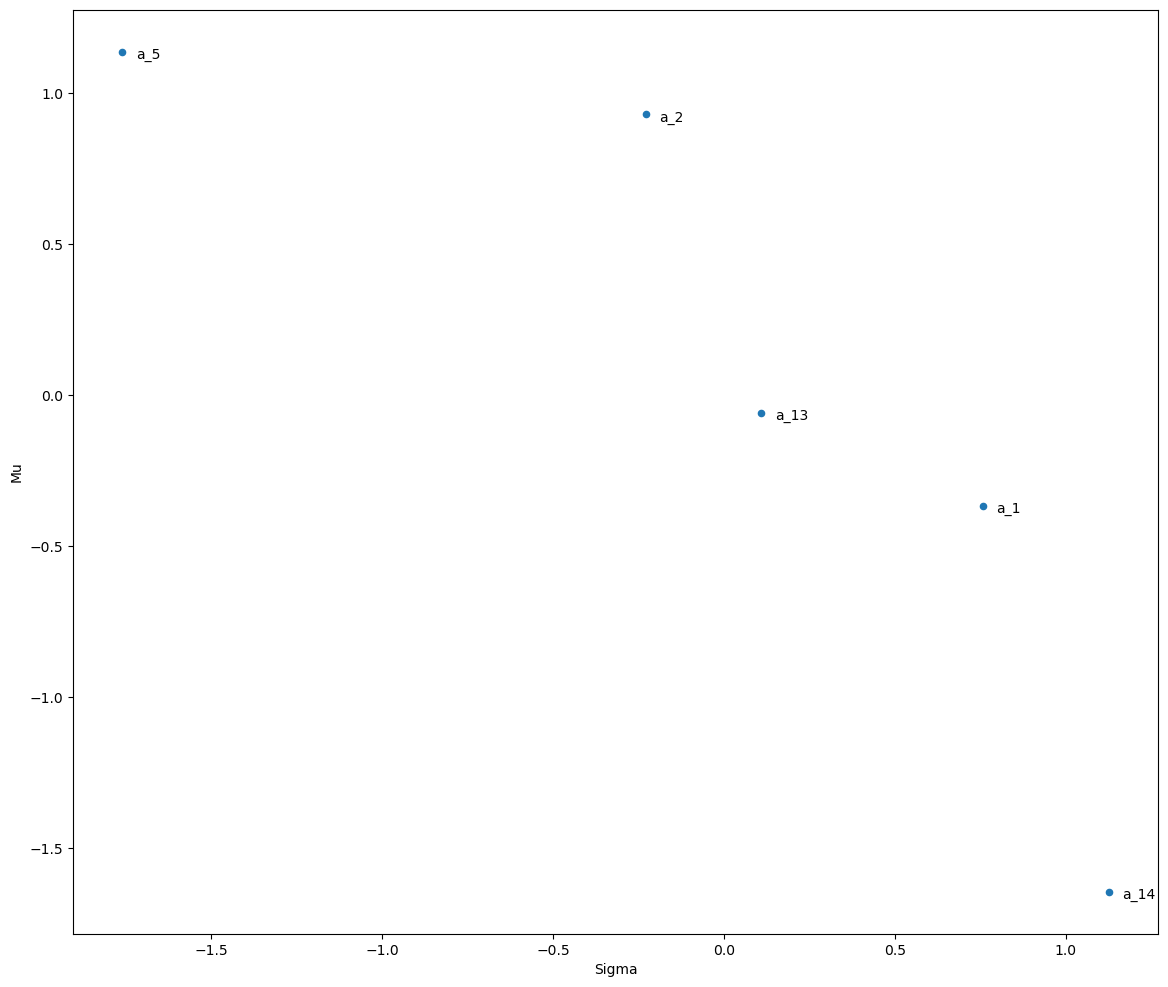

In [122]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [123]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['a_5']
PKF_2: ['a_2']
PKF_3: ['a_13']
PKF_4: ['a_1']
PKF_5: ['a_14']


In [124]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 5, fronteira 5: resolvido.


In [125]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=cluster_3.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$,$PKF_4$
a_1,-0.095191,-0.037285,-0.024528,0.000000,0.311793
a_2,-0.050592,0.000000,0.240726,0.315873,0.627665
a_5,0.000000,0.057906,0.291318,0.366465,0.678257
a_13,-0.070663,-0.012757,0.000000,0.075147,0.386939
a_14,-0.109129,-0.051224,-0.038467,-0.013939,0.000000


In [126]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
a_1,0.228758,4.0
a_2,0.838008,2.0
a_5,1.000000,1.0
a_13,0.368098,3.0
a_14,0.000000,5.0


In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
B = A.drop(['$a_15$','$a_3$'], axis=0)
B

,$g_1$,$g_2$,$g_3$,$g_4$,$g_5$
$a_1$,4.556805,9.375221,6.621607,6.741953,8.026496
$a_2$,7.390872,10.075727,10.005950,6.031683,6.244243
$a_4$,11.070830,10.166293,10.756180,8.414195,9.093147
$a_5$,7.360109,10.635684,8.902594,7.304188,8.109658
$a_6$,10.182273,10.032246,10.284850,9.691294,10.100585
$a_7$,8.995548,5.924504,11.156956,7.731754,10.129863
$a_8$,3.364086,7.114396,6.532040,10.831948,10.673397
$a_9$,8.904814,6.868012,11.943726,5.965255,9.468149
$a_10$,7.378618,6.449955,5.734325,14.876938,8.725870
$a_11$,8.318849,9.101117,7.967134,5.684293,10.443565


In [39]:
X = np.array(B)
m, n = X.shape
X

array([[ 4.5568053 ,  9.37522104,  6.62160698,  6.74195287,  8.02649625],
       [ 7.39087242, 10.0757267 , 10.00594962,  6.03168296,  6.24424312],
       [11.07082968, 10.16629306, 10.75617974,  8.41419477,  9.09314709],
       [ 7.36010893, 10.63568377,  8.90259431,  7.30418754,  8.10965808],
       [10.18227264, 10.03224573, 10.28485017,  9.69129354, 10.10058541],
       [ 8.99554766,  5.92450413, 11.15695564,  7.73175409, 10.12986349],
       [ 3.36408581,  7.11439629,  6.53204037, 10.83194804, 10.67339692],
       [ 8.90481425,  6.8680116 , 11.94372589,  5.96525538,  9.4681493 ],
       [ 7.37861759,  6.44995516,  5.73432452, 14.87693849,  8.72586955],
       [ 8.31884888,  9.1011171 ,  7.96713429,  5.68429349, 10.44356536],
       [ 7.7613336 , 10.96725624,  8.72298716,  7.04841954,  9.92954443],
       [ 7.83418582, 10.73519768,  6.48710434,  7.78266925,  4.86476065],
       [ 7.38736856,  7.9454063 ,  4.78053563,  2.04800883,  6.13021963]])

In [40]:
#solve the problem with PROMETHEE II
net_flows_toy = PROMETHEE_2 (X, [1.5 for i in range (n)], [3.5 for i in range (n)], [0 for i in range (n)], [1/n for i in range (n)], [5 for i in range (n)])[1]
net_flows_toy = pd.DataFrame(net_flows_toy, index = B.index, columns=["$\phi$"])

In [41]:
net_flows_toy["Position"] = net_flows_toy.rank(ascending=False)
net_flows_toy

,$\phi$,Position
$a_1$,-0.246426,12.0
$a_2$,-0.019608,9.0
$a_4$,0.377781,2.0
$a_5$,0.076716,4.0
$a_6$,0.392889,1.0
$a_7$,0.059981,5.0
$a_8$,-0.167974,10.0
$a_9$,0.053444,6.0
$a_10$,-0.009826,8.0
$a_11$,0.028787,7.0


In [42]:
pgrn = np.random.RandomState(0) # create a random number generator with a fixed seed

n_simulations = 10000 # number of simulations
W = np.zeros(shape = (n, n_simulations)) # weight matrix
P = np.zeros(shape = (n, n_simulations)) # preference threshold matrix
Q = np.zeros(shape = (n, n_simulations)) # indifference threshold matrix

Net_Flows = np.zeros(shape = (m, n_simulations)) # matrix that will receive the PROMETHEE II net flows
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]


s_curve = [0 for j in range (n)] # it will not be used 
pref = [5 for j in range (n)] # We will always use pref. function 5

for s in range (n_simulations):
    W [:,s] = pgrn.dirichlet(np.ones(n),size=1).reshape(n) # weights come from a dirichlet distribution
    Q [:,s] = pgrn.uniform (1,2.5, n) # q_j between 1 and 2
    P [:,s] = pgrn.uniform (2.5, 4, n) # p_j between 3 and 4
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed
simulation 31 completed
simulation 32 completed
simulation 33 completed
simulation 34 completed
simulation 35 completed
simulation 36 completed
simulation 37 completed
simulation 38 completed
simulation 39 completed
simulation 40 completed
simulation 41 completed
simulation 42 completed
s

simulation 367 completed
simulation 368 completed
simulation 369 completed
simulation 370 completed
simulation 371 completed
simulation 372 completed
simulation 373 completed
simulation 374 completed
simulation 375 completed
simulation 376 completed
simulation 377 completed
simulation 378 completed
simulation 379 completed
simulation 380 completed
simulation 381 completed
simulation 382 completed
simulation 383 completed
simulation 384 completed
simulation 385 completed
simulation 386 completed
simulation 387 completed
simulation 388 completed
simulation 389 completed
simulation 390 completed
simulation 391 completed
simulation 392 completed
simulation 393 completed
simulation 394 completed
simulation 395 completed
simulation 396 completed
simulation 397 completed
simulation 398 completed
simulation 399 completed
simulation 400 completed
simulation 401 completed
simulation 402 completed
simulation 403 completed
simulation 404 completed
simulation 405 completed
simulation 406 completed


simulation 736 completed
simulation 737 completed
simulation 738 completed
simulation 739 completed
simulation 740 completed
simulation 741 completed
simulation 742 completed
simulation 743 completed
simulation 744 completed
simulation 745 completed
simulation 746 completed
simulation 747 completed
simulation 748 completed
simulation 749 completed
simulation 750 completed
simulation 751 completed
simulation 752 completed
simulation 753 completed
simulation 754 completed
simulation 755 completed
simulation 756 completed
simulation 757 completed
simulation 758 completed
simulation 759 completed
simulation 760 completed
simulation 761 completed
simulation 762 completed
simulation 763 completed
simulation 764 completed
simulation 765 completed
simulation 766 completed
simulation 767 completed
simulation 768 completed
simulation 769 completed
simulation 770 completed
simulation 771 completed
simulation 772 completed
simulation 773 completed
simulation 774 completed
simulation 775 completed


simulation 1063 completed
simulation 1064 completed
simulation 1065 completed
simulation 1066 completed
simulation 1067 completed
simulation 1068 completed
simulation 1069 completed
simulation 1070 completed
simulation 1071 completed
simulation 1072 completed
simulation 1073 completed
simulation 1074 completed
simulation 1075 completed
simulation 1076 completed
simulation 1077 completed
simulation 1078 completed
simulation 1079 completed
simulation 1080 completed
simulation 1081 completed
simulation 1082 completed
simulation 1083 completed
simulation 1084 completed
simulation 1085 completed
simulation 1086 completed
simulation 1087 completed
simulation 1088 completed
simulation 1089 completed
simulation 1090 completed
simulation 1091 completed
simulation 1092 completed
simulation 1093 completed
simulation 1094 completed
simulation 1095 completed
simulation 1096 completed
simulation 1097 completed
simulation 1098 completed
simulation 1099 completed
simulation 1100 completed
simulation 1

simulation 1477 completed
simulation 1478 completed
simulation 1479 completed
simulation 1480 completed
simulation 1481 completed
simulation 1482 completed
simulation 1483 completed
simulation 1484 completed
simulation 1485 completed
simulation 1486 completed
simulation 1487 completed
simulation 1488 completed
simulation 1489 completed
simulation 1490 completed
simulation 1491 completed
simulation 1492 completed
simulation 1493 completed
simulation 1494 completed
simulation 1495 completed
simulation 1496 completed
simulation 1497 completed
simulation 1498 completed
simulation 1499 completed
simulation 1500 completed
simulation 1501 completed
simulation 1502 completed
simulation 1503 completed
simulation 1504 completed
simulation 1505 completed
simulation 1506 completed
simulation 1507 completed
simulation 1508 completed
simulation 1509 completed
simulation 1510 completed
simulation 1511 completed
simulation 1512 completed
simulation 1513 completed
simulation 1514 completed
simulation 1

simulation 1838 completed
simulation 1839 completed
simulation 1840 completed
simulation 1841 completed
simulation 1842 completed
simulation 1843 completed
simulation 1844 completed
simulation 1845 completed
simulation 1846 completed
simulation 1847 completed
simulation 1848 completed
simulation 1849 completed
simulation 1850 completed
simulation 1851 completed
simulation 1852 completed
simulation 1853 completed
simulation 1854 completed
simulation 1855 completed
simulation 1856 completed
simulation 1857 completed
simulation 1858 completed
simulation 1859 completed
simulation 1860 completed
simulation 1861 completed
simulation 1862 completed
simulation 1863 completed
simulation 1864 completed
simulation 1865 completed
simulation 1866 completed
simulation 1867 completed
simulation 1868 completed
simulation 1869 completed
simulation 1870 completed
simulation 1871 completed
simulation 1872 completed
simulation 1873 completed
simulation 1874 completed
simulation 1875 completed
simulation 1

simulation 2210 completed
simulation 2211 completed
simulation 2212 completed
simulation 2213 completed
simulation 2214 completed
simulation 2215 completed
simulation 2216 completed
simulation 2217 completed
simulation 2218 completed
simulation 2219 completed
simulation 2220 completed
simulation 2221 completed
simulation 2222 completed
simulation 2223 completed
simulation 2224 completed
simulation 2225 completed
simulation 2226 completed
simulation 2227 completed
simulation 2228 completed
simulation 2229 completed
simulation 2230 completed
simulation 2231 completed
simulation 2232 completed
simulation 2233 completed
simulation 2234 completed
simulation 2235 completed
simulation 2236 completed
simulation 2237 completed
simulation 2238 completed
simulation 2239 completed
simulation 2240 completed
simulation 2241 completed
simulation 2242 completed
simulation 2243 completed
simulation 2244 completed
simulation 2245 completed
simulation 2246 completed
simulation 2247 completed
simulation 2

simulation 2571 completed
simulation 2572 completed
simulation 2573 completed
simulation 2574 completed
simulation 2575 completed
simulation 2576 completed
simulation 2577 completed
simulation 2578 completed
simulation 2579 completed
simulation 2580 completed
simulation 2581 completed
simulation 2582 completed
simulation 2583 completed
simulation 2584 completed
simulation 2585 completed
simulation 2586 completed
simulation 2587 completed
simulation 2588 completed
simulation 2589 completed
simulation 2590 completed
simulation 2591 completed
simulation 2592 completed
simulation 2593 completed
simulation 2594 completed
simulation 2595 completed
simulation 2596 completed
simulation 2597 completed
simulation 2598 completed
simulation 2599 completed
simulation 2600 completed
simulation 2601 completed
simulation 2602 completed
simulation 2603 completed
simulation 2604 completed
simulation 2605 completed
simulation 2606 completed
simulation 2607 completed
simulation 2608 completed
simulation 2

simulation 2937 completed
simulation 2938 completed
simulation 2939 completed
simulation 2940 completed
simulation 2941 completed
simulation 2942 completed
simulation 2943 completed
simulation 2944 completed
simulation 2945 completed
simulation 2946 completed
simulation 2947 completed
simulation 2948 completed
simulation 2949 completed
simulation 2950 completed
simulation 2951 completed
simulation 2952 completed
simulation 2953 completed
simulation 2954 completed
simulation 2955 completed
simulation 2956 completed
simulation 2957 completed
simulation 2958 completed
simulation 2959 completed
simulation 2960 completed
simulation 2961 completed
simulation 2962 completed
simulation 2963 completed
simulation 2964 completed
simulation 2965 completed
simulation 2966 completed
simulation 2967 completed
simulation 2968 completed
simulation 2969 completed
simulation 2970 completed
simulation 2971 completed
simulation 2972 completed
simulation 2973 completed
simulation 2974 completed
simulation 2

simulation 3300 completed
simulation 3301 completed
simulation 3302 completed
simulation 3303 completed
simulation 3304 completed
simulation 3305 completed
simulation 3306 completed
simulation 3307 completed
simulation 3308 completed
simulation 3309 completed
simulation 3310 completed
simulation 3311 completed
simulation 3312 completed
simulation 3313 completed
simulation 3314 completed
simulation 3315 completed
simulation 3316 completed
simulation 3317 completed
simulation 3318 completed
simulation 3319 completed
simulation 3320 completed
simulation 3321 completed
simulation 3322 completed
simulation 3323 completed
simulation 3324 completed
simulation 3325 completed
simulation 3326 completed
simulation 3327 completed
simulation 3328 completed
simulation 3329 completed
simulation 3330 completed
simulation 3331 completed
simulation 3332 completed
simulation 3333 completed
simulation 3334 completed
simulation 3335 completed
simulation 3336 completed
simulation 3337 completed
simulation 3

simulation 3636 completed
simulation 3637 completed
simulation 3638 completed
simulation 3639 completed
simulation 3640 completed
simulation 3641 completed
simulation 3642 completed
simulation 3643 completed
simulation 3644 completed
simulation 3645 completed
simulation 3646 completed
simulation 3647 completed
simulation 3648 completed
simulation 3649 completed
simulation 3650 completed
simulation 3651 completed
simulation 3652 completed
simulation 3653 completed
simulation 3654 completed
simulation 3655 completed
simulation 3656 completed
simulation 3657 completed
simulation 3658 completed
simulation 3659 completed
simulation 3660 completed
simulation 3661 completed
simulation 3662 completed
simulation 3663 completed
simulation 3664 completed
simulation 3665 completed
simulation 3666 completed
simulation 3667 completed
simulation 3668 completed
simulation 3669 completed
simulation 3670 completed
simulation 3671 completed
simulation 3672 completed
simulation 3673 completed
simulation 3

simulation 3972 completed
simulation 3973 completed
simulation 3974 completed
simulation 3975 completed
simulation 3976 completed
simulation 3977 completed
simulation 3978 completed
simulation 3979 completed
simulation 3980 completed
simulation 3981 completed
simulation 3982 completed
simulation 3983 completed
simulation 3984 completed
simulation 3985 completed
simulation 3986 completed
simulation 3987 completed
simulation 3988 completed
simulation 3989 completed
simulation 3990 completed
simulation 3991 completed
simulation 3992 completed
simulation 3993 completed
simulation 3994 completed
simulation 3995 completed
simulation 3996 completed
simulation 3997 completed
simulation 3998 completed
simulation 3999 completed
simulation 4000 completed
simulation 4001 completed
simulation 4002 completed
simulation 4003 completed
simulation 4004 completed
simulation 4005 completed
simulation 4006 completed
simulation 4007 completed
simulation 4008 completed
simulation 4009 completed
simulation 4

simulation 4353 completed
simulation 4354 completed
simulation 4355 completed
simulation 4356 completed
simulation 4357 completed
simulation 4358 completed
simulation 4359 completed
simulation 4360 completed
simulation 4361 completed
simulation 4362 completed
simulation 4363 completed
simulation 4364 completed
simulation 4365 completed
simulation 4366 completed
simulation 4367 completed
simulation 4368 completed
simulation 4369 completed
simulation 4370 completed
simulation 4371 completed
simulation 4372 completed
simulation 4373 completed
simulation 4374 completed
simulation 4375 completed
simulation 4376 completed
simulation 4377 completed
simulation 4378 completed
simulation 4379 completed
simulation 4380 completed
simulation 4381 completed
simulation 4382 completed
simulation 4383 completed
simulation 4384 completed
simulation 4385 completed
simulation 4386 completed
simulation 4387 completed
simulation 4388 completed
simulation 4389 completed
simulation 4390 completed
simulation 4

simulation 4709 completed
simulation 4710 completed
simulation 4711 completed
simulation 4712 completed
simulation 4713 completed
simulation 4714 completed
simulation 4715 completed
simulation 4716 completed
simulation 4717 completed
simulation 4718 completed
simulation 4719 completed
simulation 4720 completed
simulation 4721 completed
simulation 4722 completed
simulation 4723 completed
simulation 4724 completed
simulation 4725 completed
simulation 4726 completed
simulation 4727 completed
simulation 4728 completed
simulation 4729 completed
simulation 4730 completed
simulation 4731 completed
simulation 4732 completed
simulation 4733 completed
simulation 4734 completed
simulation 4735 completed
simulation 4736 completed
simulation 4737 completed
simulation 4738 completed
simulation 4739 completed
simulation 4740 completed
simulation 4741 completed
simulation 4742 completed
simulation 4743 completed
simulation 4744 completed
simulation 4745 completed
simulation 4746 completed
simulation 4

simulation 5092 completed
simulation 5093 completed
simulation 5094 completed
simulation 5095 completed
simulation 5096 completed
simulation 5097 completed
simulation 5098 completed
simulation 5099 completed
simulation 5100 completed
simulation 5101 completed
simulation 5102 completed
simulation 5103 completed
simulation 5104 completed
simulation 5105 completed
simulation 5106 completed
simulation 5107 completed
simulation 5108 completed
simulation 5109 completed
simulation 5110 completed
simulation 5111 completed
simulation 5112 completed
simulation 5113 completed
simulation 5114 completed
simulation 5115 completed
simulation 5116 completed
simulation 5117 completed
simulation 5118 completed
simulation 5119 completed
simulation 5120 completed
simulation 5121 completed
simulation 5122 completed
simulation 5123 completed
simulation 5124 completed
simulation 5125 completed
simulation 5126 completed
simulation 5127 completed
simulation 5128 completed
simulation 5129 completed
simulation 5

simulation 5447 completed
simulation 5448 completed
simulation 5449 completed
simulation 5450 completed
simulation 5451 completed
simulation 5452 completed
simulation 5453 completed
simulation 5454 completed
simulation 5455 completed
simulation 5456 completed
simulation 5457 completed
simulation 5458 completed
simulation 5459 completed
simulation 5460 completed
simulation 5461 completed
simulation 5462 completed
simulation 5463 completed
simulation 5464 completed
simulation 5465 completed
simulation 5466 completed
simulation 5467 completed
simulation 5468 completed
simulation 5469 completed
simulation 5470 completed
simulation 5471 completed
simulation 5472 completed
simulation 5473 completed
simulation 5474 completed
simulation 5475 completed
simulation 5476 completed
simulation 5477 completed
simulation 5478 completed
simulation 5479 completed
simulation 5480 completed
simulation 5481 completed
simulation 5482 completed
simulation 5483 completed
simulation 5484 completed
simulation 5

simulation 5802 completed
simulation 5803 completed
simulation 5804 completed
simulation 5805 completed
simulation 5806 completed
simulation 5807 completed
simulation 5808 completed
simulation 5809 completed
simulation 5810 completed
simulation 5811 completed
simulation 5812 completed
simulation 5813 completed
simulation 5814 completed
simulation 5815 completed
simulation 5816 completed
simulation 5817 completed
simulation 5818 completed
simulation 5819 completed
simulation 5820 completed
simulation 5821 completed
simulation 5822 completed
simulation 5823 completed
simulation 5824 completed
simulation 5825 completed
simulation 5826 completed
simulation 5827 completed
simulation 5828 completed
simulation 5829 completed
simulation 5830 completed
simulation 5831 completed
simulation 5832 completed
simulation 5833 completed
simulation 5834 completed
simulation 5835 completed
simulation 5836 completed
simulation 5837 completed
simulation 5838 completed
simulation 5839 completed
simulation 5

simulation 6126 completed
simulation 6127 completed
simulation 6128 completed
simulation 6129 completed
simulation 6130 completed
simulation 6131 completed
simulation 6132 completed
simulation 6133 completed
simulation 6134 completed
simulation 6135 completed
simulation 6136 completed
simulation 6137 completed
simulation 6138 completed
simulation 6139 completed
simulation 6140 completed
simulation 6141 completed
simulation 6142 completed
simulation 6143 completed
simulation 6144 completed
simulation 6145 completed
simulation 6146 completed
simulation 6147 completed
simulation 6148 completed
simulation 6149 completed
simulation 6150 completed
simulation 6151 completed
simulation 6152 completed
simulation 6153 completed
simulation 6154 completed
simulation 6155 completed
simulation 6156 completed
simulation 6157 completed
simulation 6158 completed
simulation 6159 completed
simulation 6160 completed
simulation 6161 completed
simulation 6162 completed
simulation 6163 completed
simulation 6

simulation 6488 completed
simulation 6489 completed
simulation 6490 completed
simulation 6491 completed
simulation 6492 completed
simulation 6493 completed
simulation 6494 completed
simulation 6495 completed
simulation 6496 completed
simulation 6497 completed
simulation 6498 completed
simulation 6499 completed
simulation 6500 completed
simulation 6501 completed
simulation 6502 completed
simulation 6503 completed
simulation 6504 completed
simulation 6505 completed
simulation 6506 completed
simulation 6507 completed
simulation 6508 completed
simulation 6509 completed
simulation 6510 completed
simulation 6511 completed
simulation 6512 completed
simulation 6513 completed
simulation 6514 completed
simulation 6515 completed
simulation 6516 completed
simulation 6517 completed
simulation 6518 completed
simulation 6519 completed
simulation 6520 completed
simulation 6521 completed
simulation 6522 completed
simulation 6523 completed
simulation 6524 completed
simulation 6525 completed
simulation 6

simulation 6843 completed
simulation 6844 completed
simulation 6845 completed
simulation 6846 completed
simulation 6847 completed
simulation 6848 completed
simulation 6849 completed
simulation 6850 completed
simulation 6851 completed
simulation 6852 completed
simulation 6853 completed
simulation 6854 completed
simulation 6855 completed
simulation 6856 completed
simulation 6857 completed
simulation 6858 completed
simulation 6859 completed
simulation 6860 completed
simulation 6861 completed
simulation 6862 completed
simulation 6863 completed
simulation 6864 completed
simulation 6865 completed
simulation 6866 completed
simulation 6867 completed
simulation 6868 completed
simulation 6869 completed
simulation 6870 completed
simulation 6871 completed
simulation 6872 completed
simulation 6873 completed
simulation 6874 completed
simulation 6875 completed
simulation 6876 completed
simulation 6877 completed
simulation 6878 completed
simulation 6879 completed
simulation 6880 completed
simulation 6

simulation 7202 completed
simulation 7203 completed
simulation 7204 completed
simulation 7205 completed
simulation 7206 completed
simulation 7207 completed
simulation 7208 completed
simulation 7209 completed
simulation 7210 completed
simulation 7211 completed
simulation 7212 completed
simulation 7213 completed
simulation 7214 completed
simulation 7215 completed
simulation 7216 completed
simulation 7217 completed
simulation 7218 completed
simulation 7219 completed
simulation 7220 completed
simulation 7221 completed
simulation 7222 completed
simulation 7223 completed
simulation 7224 completed
simulation 7225 completed
simulation 7226 completed
simulation 7227 completed
simulation 7228 completed
simulation 7229 completed
simulation 7230 completed
simulation 7231 completed
simulation 7232 completed
simulation 7233 completed
simulation 7234 completed
simulation 7235 completed
simulation 7236 completed
simulation 7237 completed
simulation 7238 completed
simulation 7239 completed
simulation 7

simulation 7580 completed
simulation 7581 completed
simulation 7582 completed
simulation 7583 completed
simulation 7584 completed
simulation 7585 completed
simulation 7586 completed
simulation 7587 completed
simulation 7588 completed
simulation 7589 completed
simulation 7590 completed
simulation 7591 completed
simulation 7592 completed
simulation 7593 completed
simulation 7594 completed
simulation 7595 completed
simulation 7596 completed
simulation 7597 completed
simulation 7598 completed
simulation 7599 completed
simulation 7600 completed
simulation 7601 completed
simulation 7602 completed
simulation 7603 completed
simulation 7604 completed
simulation 7605 completed
simulation 7606 completed
simulation 7607 completed
simulation 7608 completed
simulation 7609 completed
simulation 7610 completed
simulation 7611 completed
simulation 7612 completed
simulation 7613 completed
simulation 7614 completed
simulation 7615 completed
simulation 7616 completed
simulation 7617 completed
simulation 7

simulation 7940 completed
simulation 7941 completed
simulation 7942 completed
simulation 7943 completed
simulation 7944 completed
simulation 7945 completed
simulation 7946 completed
simulation 7947 completed
simulation 7948 completed
simulation 7949 completed
simulation 7950 completed
simulation 7951 completed
simulation 7952 completed
simulation 7953 completed
simulation 7954 completed
simulation 7955 completed
simulation 7956 completed
simulation 7957 completed
simulation 7958 completed
simulation 7959 completed
simulation 7960 completed
simulation 7961 completed
simulation 7962 completed
simulation 7963 completed
simulation 7964 completed
simulation 7965 completed
simulation 7966 completed
simulation 7967 completed
simulation 7968 completed
simulation 7969 completed
simulation 7970 completed
simulation 7971 completed
simulation 7972 completed
simulation 7973 completed
simulation 7974 completed
simulation 7975 completed
simulation 7976 completed
simulation 7977 completed
simulation 7

simulation 8271 completed
simulation 8272 completed
simulation 8273 completed
simulation 8274 completed
simulation 8275 completed
simulation 8276 completed
simulation 8277 completed
simulation 8278 completed
simulation 8279 completed
simulation 8280 completed
simulation 8281 completed
simulation 8282 completed
simulation 8283 completed
simulation 8284 completed
simulation 8285 completed
simulation 8286 completed
simulation 8287 completed
simulation 8288 completed
simulation 8289 completed
simulation 8290 completed
simulation 8291 completed
simulation 8292 completed
simulation 8293 completed
simulation 8294 completed
simulation 8295 completed
simulation 8296 completed
simulation 8297 completed
simulation 8298 completed
simulation 8299 completed
simulation 8300 completed
simulation 8301 completed
simulation 8302 completed
simulation 8303 completed
simulation 8304 completed
simulation 8305 completed
simulation 8306 completed
simulation 8307 completed
simulation 8308 completed
simulation 8

simulation 8612 completed
simulation 8613 completed
simulation 8614 completed
simulation 8615 completed
simulation 8616 completed
simulation 8617 completed
simulation 8618 completed
simulation 8619 completed
simulation 8620 completed
simulation 8621 completed
simulation 8622 completed
simulation 8623 completed
simulation 8624 completed
simulation 8625 completed
simulation 8626 completed
simulation 8627 completed
simulation 8628 completed
simulation 8629 completed
simulation 8630 completed
simulation 8631 completed
simulation 8632 completed
simulation 8633 completed
simulation 8634 completed
simulation 8635 completed
simulation 8636 completed
simulation 8637 completed
simulation 8638 completed
simulation 8639 completed
simulation 8640 completed
simulation 8641 completed
simulation 8642 completed
simulation 8643 completed
simulation 8644 completed
simulation 8645 completed
simulation 8646 completed
simulation 8647 completed
simulation 8648 completed
simulation 8649 completed
simulation 8

simulation 8965 completed
simulation 8966 completed
simulation 8967 completed
simulation 8968 completed
simulation 8969 completed
simulation 8970 completed
simulation 8971 completed
simulation 8972 completed
simulation 8973 completed
simulation 8974 completed
simulation 8975 completed
simulation 8976 completed
simulation 8977 completed
simulation 8978 completed
simulation 8979 completed
simulation 8980 completed
simulation 8981 completed
simulation 8982 completed
simulation 8983 completed
simulation 8984 completed
simulation 8985 completed
simulation 8986 completed
simulation 8987 completed
simulation 8988 completed
simulation 8989 completed
simulation 8990 completed
simulation 8991 completed
simulation 8992 completed
simulation 8993 completed
simulation 8994 completed
simulation 8995 completed
simulation 8996 completed
simulation 8997 completed
simulation 8998 completed
simulation 8999 completed
simulation 9000 completed
simulation 9001 completed
simulation 9002 completed
simulation 9

simulation 9313 completed
simulation 9314 completed
simulation 9315 completed
simulation 9316 completed
simulation 9317 completed
simulation 9318 completed
simulation 9319 completed
simulation 9320 completed
simulation 9321 completed
simulation 9322 completed
simulation 9323 completed
simulation 9324 completed
simulation 9325 completed
simulation 9326 completed
simulation 9327 completed
simulation 9328 completed
simulation 9329 completed
simulation 9330 completed
simulation 9331 completed
simulation 9332 completed
simulation 9333 completed
simulation 9334 completed
simulation 9335 completed
simulation 9336 completed
simulation 9337 completed
simulation 9338 completed
simulation 9339 completed
simulation 9340 completed
simulation 9341 completed
simulation 9342 completed
simulation 9343 completed
simulation 9344 completed
simulation 9345 completed
simulation 9346 completed
simulation 9347 completed
simulation 9348 completed
simulation 9349 completed
simulation 9350 completed
simulation 9

simulation 9660 completed
simulation 9661 completed
simulation 9662 completed
simulation 9663 completed
simulation 9664 completed
simulation 9665 completed
simulation 9666 completed
simulation 9667 completed
simulation 9668 completed
simulation 9669 completed
simulation 9670 completed
simulation 9671 completed
simulation 9672 completed
simulation 9673 completed
simulation 9674 completed
simulation 9675 completed
simulation 9676 completed
simulation 9677 completed
simulation 9678 completed
simulation 9679 completed
simulation 9680 completed
simulation 9681 completed
simulation 9682 completed
simulation 9683 completed
simulation 9684 completed
simulation 9685 completed
simulation 9686 completed
simulation 9687 completed
simulation 9688 completed
simulation 9689 completed
simulation 9690 completed
simulation 9691 completed
simulation 9692 completed
simulation 9693 completed
simulation 9694 completed
simulation 9695 completed
simulation 9696 completed
simulation 9697 completed
simulation 9

In [43]:
pd.DataFrame(W).to_csv("W_toy.csv")
pd.DataFrame(Q).to_csv("Q_toy.csv")
pd.DataFrame(P).to_csv("P_toy.csv")
pd.DataFrame(Net_Flows).to_csv("Net_Flows_toy.csv")
pd.DataFrame(Pos_Flows).to_csv("Pos_Flows_toy.csv")
pd.DataFrame(Neg_Flows).to_csv("Neg_Flows_toy.csv")
pd.concat(results, axis = 1).to_csv("results_SMAA_toy.csv")

In [44]:
W=pd.read_csv("W_toy.csv", index_col=0)
Q=pd.read_csv("Q_toy.csv", index_col=0)
P=pd.read_csv("P_toy.csv", index_col=0)
Net_Flows=pd.read_csv("Net_Flows_toy.csv", index_col=0)
Pos_Flows=pd.read_csv("Pos_Flows_toy.csv", index_col=0)
Neg_Flows=pd.read_csv("Neg_Flows_toy.csv", index_col=0)
results=pd.read_csv("results_SMAA_toy.csv", index_col=0)

In [45]:
W=np.array(W)
Q=np.array(Q)
P=np.array(P)
Net_Flows=np.array(Net_Flows)
Pos_Flows=np.array(Pos_Flows)
Neg_Flows=np.array(Neg_Flows)
results=np.array(results)

In [46]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= B.index)
Sigma_Mu_df

,Sigma,Mu
$a_1$,0.145261,-0.252626
$a_2$,0.152542,-0.019040
$a_4$,0.096823,0.378225
$a_5$,0.072226,0.078478
$a_6$,0.050150,0.393297
$a_7$,0.167306,0.061211
$a_8$,0.242325,-0.165134
$a_9$,0.168375,0.061952
$a_10$,0.241926,-0.009933
$a_11$,0.090727,0.027035


In [47]:
Sigma_Mu_df_transformed = StandardScaler().fit_transform(Sigma_Mu_df)
Sigma_Mu_df_transformed = pd.DataFrame(Sigma_Mu_df_transformed, columns=['Sigma', 'Mu'], index = B.index)
Sigma_Mu_df_transformed

,Sigma,Mu
$a_1$,0.085643,-1.077227
$a_2$,0.210290,-0.081189
$a_4$,-0.743495,1.612798
$a_5$,-1.164541,0.334641
$a_6$,-1.542427,1.677065
$a_7$,0.463006,0.261010
$a_8$,1.747148,-0.704150
$a_9$,0.481298,0.264169
$a_10$,1.740319,-0.042354
$a_11$,-0.847848,0.115281


C:\Users\igor2\AppData\Local\Temp\ipykernel_20300\188652928.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


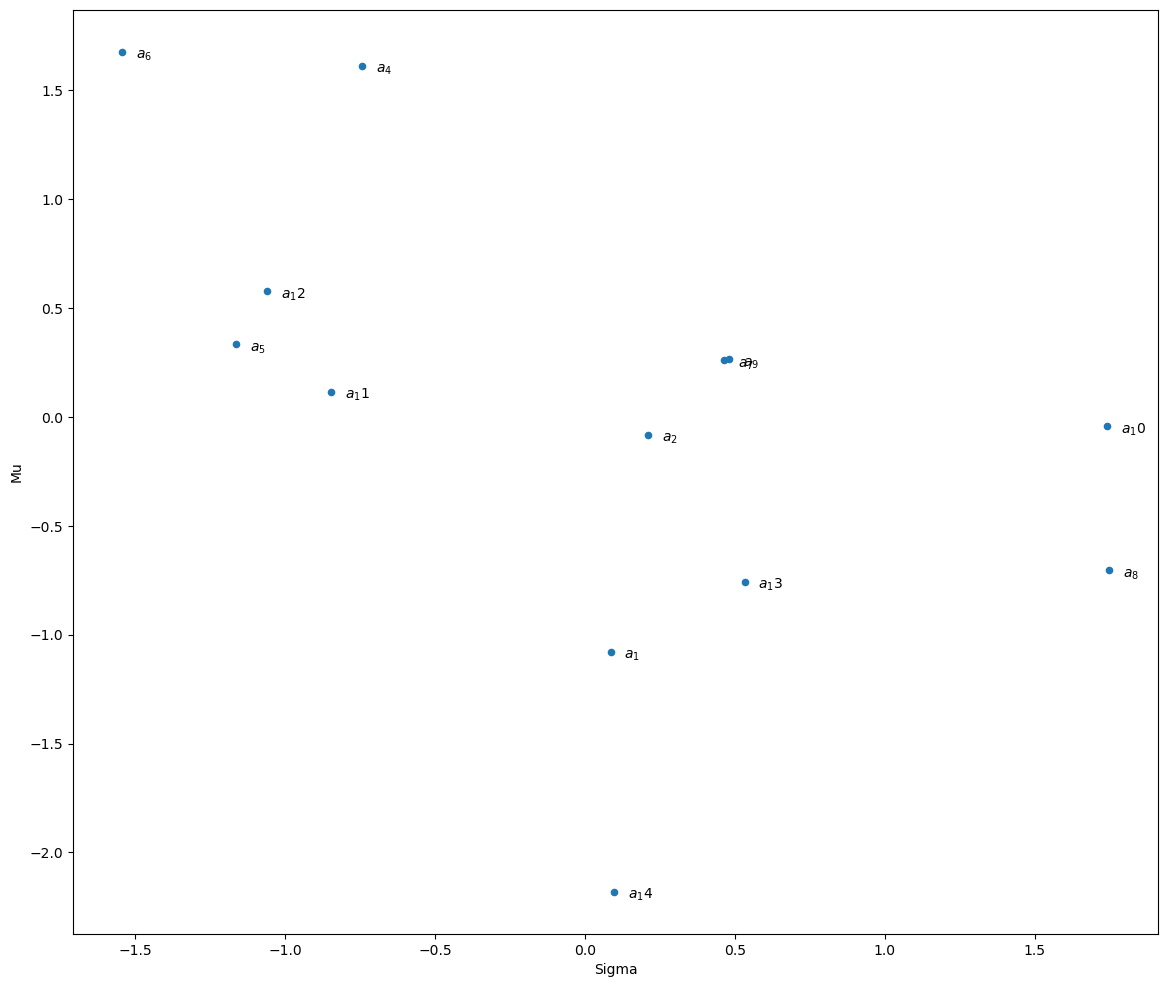

In [48]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df_transformed.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (14,12))
for k, v in Sigma_Mu_df_transformed.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='black')
for k, v in Sigma_Mu_df_transformed.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')

In [49]:
df =Sigma_Mu_df.copy()
PKF=[]
count=0
while df.shape[0]>0:
    PKF.append([])
    for idx in df.index:
        comp_df = df.copy()
        comp_df.drop(index = idx)
        if any([any([
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])), # loose in both dimensions
                ((df.loc[idx][0] > comp_df.iloc[i,0]) and (df.loc[idx][1] == comp_df.iloc[i,1])), # loose in first dimension and drow in second
                ((df.loc[idx][0] == comp_df.iloc[i,0]) and (df.loc[idx][1] < comp_df.iloc[i,1])) # loose in the second dimension 
                    ]) for i in range (comp_df.shape[0])]
                ) == False:
            PKF[count].append(idx)
    
    if len(PKF[count]) == 0:
        PKF[count].append(df.index)
        break
    else:
        df = df.drop(index=PKF[count])
        print(f'PKF_{str(count+1)}: {PKF[count]}')
        count+=1

PKF_1: ['$a_6$']
PKF_2: ['$a_4$', '$a_5$', '$a_12$']
PKF_3: ['$a_7$', '$a_9$', '$a_11$']
PKF_4: ['$a_1$', '$a_2$', '$a_10$']
PKF_5: ['$a_8$', '$a_13$', '$a_14$']


In [50]:
lambda_ = 0

# Run optimization and get the local efficiences
m = Sigma_Mu_df.shape[0] # number of alternatives
m_f = len(PKF) # number of frontiers
local_ef = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
local_ef_new = np.zeros(shape = (Sigma_Mu_df.shape[0], len(PKF)))
for unit in range (m):
    for fr in range (m_f):
        unit_sigmamu = np.array([Sigma_Mu_df.iloc[unit]]) # get the alternative unit        
        Fr_list = [] # list of alternatives within frontier fr or within a less preferred one
        for k in range(fr, m_f):
            for l in range(len(PKF[k])):
                Fr_list.append(PKF[k][l])
        Fr_sigmamu = np.array (Sigma_Mu_df.loc[Fr_list]) # get alternatives within frontier fr or a less preferred one
        M, resultado = optimize_PROM2_original(unit_sigmamu, Fr_sigmamu)
        local_ef[unit, fr] = M.obj()
        M_new, resultado_new = optimize_newconstraint(unit_sigmamu, Fr_sigmamu, lambda_)
        local_ef_new[unit, fr] = M_new.obj()
        print(f'alternative {unit+1}, fronteira {fr + 1}: resolvido.')

alternative 1, fronteira 1: resolvido.
alternative 1, fronteira 2: resolvido.
alternative 1, fronteira 3: resolvido.
alternative 1, fronteira 4: resolvido.
alternative 1, fronteira 5: resolvido.
alternative 2, fronteira 1: resolvido.
alternative 2, fronteira 2: resolvido.
alternative 2, fronteira 3: resolvido.
alternative 2, fronteira 4: resolvido.
alternative 2, fronteira 5: resolvido.
alternative 3, fronteira 1: resolvido.
alternative 3, fronteira 2: resolvido.
alternative 3, fronteira 3: resolvido.
alternative 3, fronteira 4: resolvido.
alternative 3, fronteira 5: resolvido.
alternative 4, fronteira 1: resolvido.
alternative 4, fronteira 2: resolvido.
alternative 4, fronteira 3: resolvido.
alternative 4, fronteira 4: resolvido.
alternative 4, fronteira 5: resolvido.
alternative 5, fronteira 1: resolvido.
alternative 5, fronteira 2: resolvido.
alternative 5, fronteira 3: resolvido.
alternative 5, fronteira 4: resolvido.
alternative 5, fronteira 5: resolvido.
alternative 6, fronteira 

In [51]:
# Print local efficiencies
pd.DataFrame(local_ef, columns = ['$PKF_' + str(i) +'$' for i in range(len(PKF))], index=B.index)

,$PKF_0$,$PKF_1$,$PKF_2$,$PKF_3$,$PKF_4$
$a_1$,-0.095111,-0.073035,-0.054534,0.000000,0.018938
$a_2$,-0.102393,-0.080317,-0.050958,0.000000,0.146094
$a_4$,-0.015072,0.000000,0.316274,0.388158,0.543359
$a_5$,-0.022076,0.000000,0.041225,0.095928,0.243612
$a_6$,0.000000,0.044277,0.331345,0.403230,0.558431
$a_7$,-0.117156,-0.089179,-0.000179,0.071465,0.226345
$a_8$,-0.192175,-0.170099,-0.151598,-0.091485,0.000000
$a_9$,-0.118225,-0.090111,0.000000,0.072038,0.227085
$a_10$,-0.191776,-0.163536,-0.071884,0.000000,0.155201
$a_11$,-0.040577,-0.018501,0.000000,0.061340,0.192169


In [52]:
global_ef = np.sum(local_ef, axis = 1)
global_ef = (global_ef - global_ef.min()) /(global_ef.max() - global_ef.min())

results = pd.DataFrame({"Global Efficiency": global_ef}, index = Sigma_Mu_df.index)
results = results.assign(Position = results.rank(ascending=False))
results

,Global Efficiency,Position
$a_1$,0.206737,9.0
$a_2$,0.266536,8.0
$a_4$,0.946175,2.0
$a_5$,0.496256,4.0
$a_6$,1.000000,1.0
$a_7$,0.358611,6.0
$a_8$,0.000000,13.0
$a_9$,0.358350,7.0
$a_10$,0.171603,11.0
$a_11$,0.411702,5.0


In [53]:
results.to_excel("Ranking_Promethee_scoring_Kmeans_Toy_example.xlsx")